# Bay Area Bike Share

jupyter nbconvert your_slides.ipynb --to slides --post serve

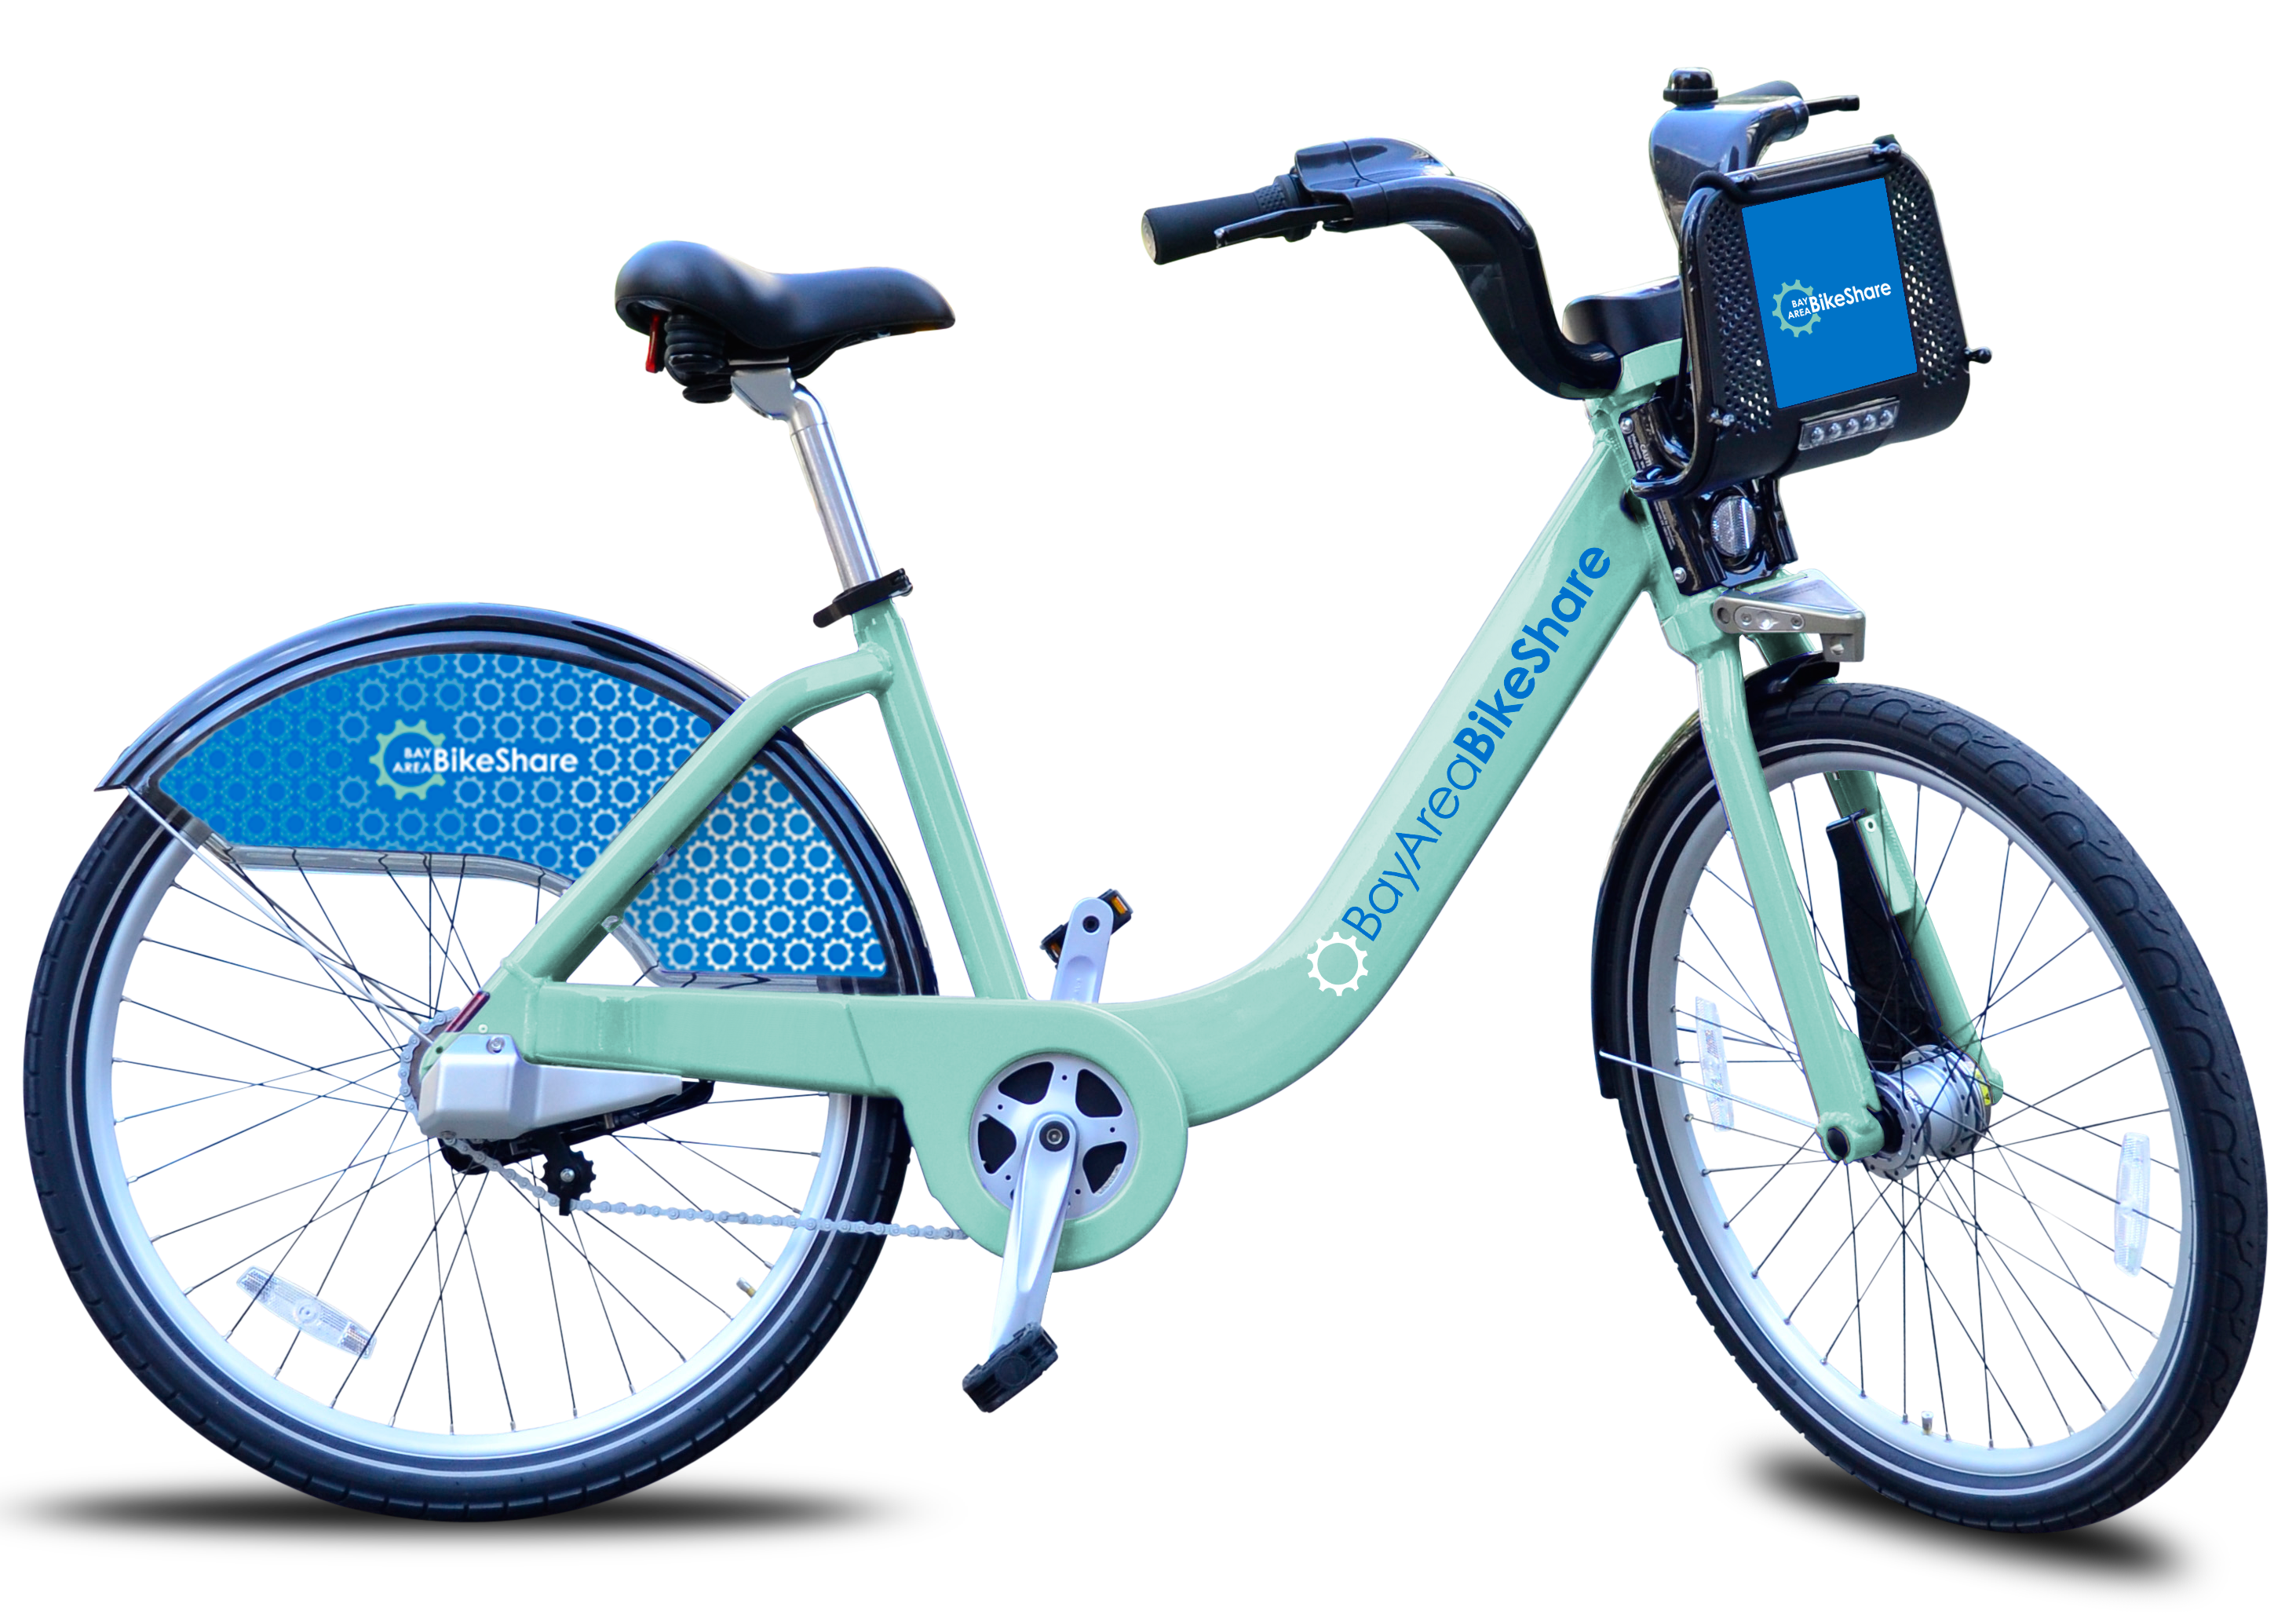

In [134]:
from IPython.display import Image
Image(filename='Bay_area_bike_share.png')

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime as datetime

In [136]:
station = pd.read_csv("201608_station_data.csv")
status = pd.read_csv("201608_status_data.csv")
trip = pd.read_csv("201608_trip_data.csv")
weather = pd.read_csv("201608_weather_data.csv")

## Station data

In [137]:
station.head()

station_id                               name        lat        long  \
0         2.0  San Jose Diridon Caltrain Station  37.329732 -121.901782   
1         3.0              San Jose Civic Center  37.330698 -121.888979   
2         4.0             Santa Clara at Almaden  37.333988 -121.894902   
3         5.0                   Adobe on Almaden  37.331415 -121.893200   
4         6.0                   San Pedro Square  37.336721 -121.894074   

   dockcount  landmark installation  
0       27.0  San Jose     8/6/2013  
1       15.0  San Jose     8/5/2013  
2       11.0  San Jose     8/6/2013  
3       19.0  San Jose     8/5/2013  
4       15.0  San Jose     8/7/2013

In [138]:
station = station.dropna()
station.shape

(67, 7)

In [139]:
# Saving the dataframe to import it into carto
#station.to_csv('Stationdata.csv', sep=',')

In [140]:
print station.landmark.value_counts()

San Francisco    37
San Jose         18
Mountain View     7
Palo Alto         5
Name: landmark, dtype: int64


In [333]:
from IPython.display import IFrame
IFrame("https://chrisscross8.carto.com/builder/0496b2dc-0c81-11e7-a5a9-0e05a8b3e3d7/embed", width=970, height=600)

In [389]:
#Image(filename='Regionmap.png')

# Trip data

In [142]:
trip.head()

Trip ID  Duration     Start Date                            Start Station  \
0   913465       746  9/1/2015 0:10  San Francisco Caltrain 2 (330 Townsend)   
1   913466       969  9/1/2015 0:15                          Clay at Battery   
2   913467       233  9/1/2015 0:15                         Davis at Jackson   
3   913468       213  9/1/2015 1:29                          Clay at Battery   
4   913469       574  9/1/2015 1:33                        Steuart at Market   

   Start Terminal       End Date                              End Station  \
0              69  9/1/2015 0:23                  San Francisco City Hall   
1              41  9/1/2015 0:31                     Washington at Kearny   
2              42  9/1/2015 0:19                 Commercial at Montgomery   
3              41  9/1/2015 1:32                        Steuart at Market   
4              74  9/1/2015 1:42  San Francisco Caltrain 2 (330 Townsend)   

   End Terminal  Bike # Subscriber Type Zip Code  
0            58     238      Subscriber    94107  
1            46      16      Subscriber    94133  
2            45     534      Subscriber    94111  
3            74     312      Subscriber    94107  
4            69     279      Subscriber    94107

In [143]:
print trip.shape

(313689, 11)


In [144]:
#trip[trip.isnull().any(axis=1)].shape     # the shape if I delete all NaNs

In [145]:
# Number of subscribers/nonsubscribers with respect to trips taken
print trip['Subscriber Type'].value_counts()

Subscriber    280093
Customer       33596
Name: Subscriber Type, dtype: int64


### ZIP codes

In [146]:
trip_s = trip[trip['Subscriber Type']=='Subscriber']
trip_c = trip[trip['Subscriber Type']=='Customer']

In [147]:
trip_s2 = trip[['Zip Code']]
trip_c2 = trip[['Zip Code']]

In [148]:
# Saving the dataframes to import them into carto
#trip_s2.to_csv('Trip_s.csv', sep=',')
#trip_c2.to_csv('Trip_c.csv', sep=',')

In [149]:
Zip_SF = ['94102', '94103', '94104', '94105', '94107', '94108', '94109', '94110', '94111', '94112', '94114', '94115', '94116', '94117', '94118', '94121', '94122', '94123', '94124', '94127', '94129', '94130', '94131', '94132', '94133', '94134', '94158']
Zip_PA = ['94022', '94301', '94303', '94304', '94305', '94306', '95014', '95033','94028']
Zip_SJ = ['94089', '95002', '95008', '95013', '95014', '95032', '95035', '95037', '95050', '95054', '95070', '95110', '95111', '95112', '95113', '95116', '95117', '95118', '95119', '95120', '95121', '95122', '95123', '95124', '95125', '95126', '95127', '95128', '95129', '95130', '95131', '95132', '95133', '95134', '95135', '95136', '95138', '95139', '95140', '95148']
Zip_MV = ['94024', '94040', '94041', '94043', '94085', '94086', '94087']
Zip_surr = ['94965','94015','94014','94005','94080','94044','94066','94128','94030','94038','94010','94401','94403','94402','94404','94002','94070','94065','94063','94061','94027','94025','94019','94062','94038','94020','95033','95070']

In [150]:
def Zipcodes(zip):
    if zip in Zip_SF:
        return 1
    elif zip in Zip_PA:
        return 2
    elif zip in Zip_SJ:
        return 3
    elif zip in Zip_MV:
        return 4
    elif zip in Zip_surr:
        return 5
    elif pd.isnull(zip):
        return np.nan
    else:
        return 0
    
trip_s['zipcode_group'] = trip_s['Zip Code'].apply(Zipcodes)  
trip_c['zipcode_group'] = trip_c['Zip Code'].apply(Zipcodes)    

C:\Users\Christiana\Anaconda3\envs\venv\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Christiana\Anaconda3\envs\venv\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


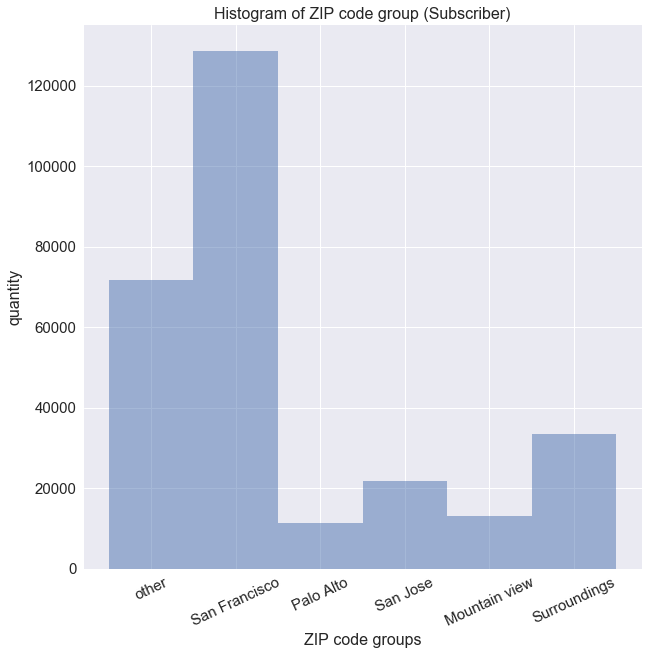

In [151]:
bins = np.arange(0,7) - 0.5
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(trip_s['zipcode_group'],bins=bins,alpha=0.5)
#plt.xticks(np.array([0,1,2,3,4]))
plt.xticks(range(6),['other','San Francisco','Palo Alto','San Jose','Mountain view','Surroundings'],rotation=25,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('ZIP code groups',fontsize=16)
plt.ylabel('quantity',fontsize=16)
plt.title('Histogram of ZIP code group (Subscriber)',fontsize=16)
plt.show()

In [152]:
trip_s['zipcode_group'].value_counts()

1    128647
0     71693
5     33484
3     21883
4     13177
2     11209
Name: zipcode_group, dtype: int64

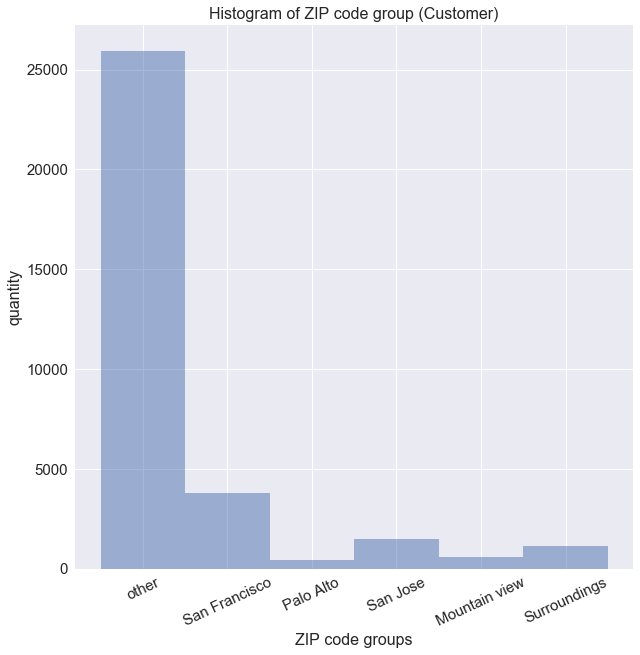

In [153]:
bins = np.arange(0,7) - 0.5
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(trip_c['zipcode_group'].dropna(),bins=bins,alpha=0.5)
plt.xticks(range(6),['other','San Francisco','Palo Alto','San Jose','Mountain view','Surroundings'],rotation=25,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('ZIP code groups',fontsize=16)
plt.ylabel('quantity',fontsize=16)
plt.title('Histogram of ZIP code group (Customer)',fontsize=16)
plt.show()

In [154]:
trip_c['zipcode_group'].value_counts()

0.0    25943
1.0     3788
3.0     1481
5.0     1149
4.0      595
2.0      449
Name: zipcode_group, dtype: int64

In [155]:
SF_data_s = trip_s[trip_s['zipcode_group']==1] 
rest_data_s = trip_s[(trip_s['zipcode_group'] == 2) | (trip_s['zipcode_group'] == 3) | (trip_s['zipcode_group'] == 4)] 
SF_data_c = trip_c[trip_c['zipcode_group']==1] 
rest_data_c = trip_c[(trip_c['zipcode_group']==2) | (trip_c['zipcode_group']==3) | (trip_c['zipcode_group']==4)]

In [156]:
#print 'SF has %d subscribers and %d customers, therefore %.2f percent are customers' % (SF_data_s.shape[0],SF_data_c.shape[0],100*SF_data_c.shape[0]/SF_data_s.shape[0])
#print 'PA, MV and SJ have %d subscribers and %d customers, therefore %.2f percent are customers' % (rest_data_s.shape[0],rest_data_c.shape[0],100*rest_data_c.shape[0]/rest_data_s.shape[0])

### Activity

C:\Users\Christiana\Anaconda3\envs\venv\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


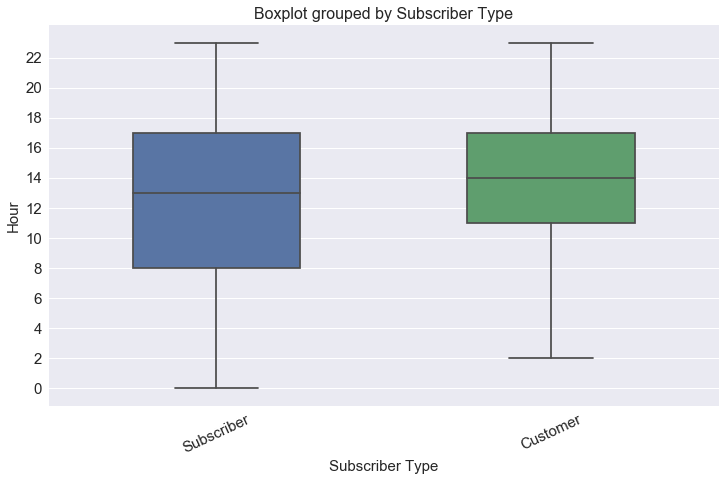

In [157]:
trip['Start Date'] = pd.to_datetime(trip['Start Date'])

fig = plt.figure(figsize=(12,7))
trip_copy = trip[:]    
trip_copy['hour'] = trip_copy['Start Date'].apply(lambda x: x.hour) 
sns.boxplot(x='Subscriber Type', y='hour', data=trip_copy, width=0.5,showfliers=False)
plt.xlabel('Subscriber Type',fontsize=15)
plt.ylabel('Hour',fontsize=15)
plt.xticks(rotation=25,fontsize=15)
plt.yticks(range(0,24,2),fontsize=15)
plt.title('Boxplot grouped by Subscriber Type',fontsize=16)
plt.show()

In [158]:
trip_s['Start Date'] = pd.to_datetime(trip_s['Start Date'])
trip_c['Start Date'] = pd.to_datetime(trip_c['Start Date'])

C:\Users\Christiana\Anaconda3\envs\venv\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Christiana\Anaconda3\envs\venv\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [159]:
def Timeframes(date):
    if date.hour in np.arange(7,10):
        return 4
    elif date.hour in np.arange(10,13):
        return 5
    elif date.hour in np.arange(13,16):
        return 6
    elif date.hour in np.arange(16,19):
        return 7
    elif date.hour in np.arange(19,22):
        return 8
    elif date.hour in [22,23,0,1]:
        return 1
    elif date.hour in np.arange(1,4):
        return 2
    elif date.hour in np.arange(4,7):
        return 3
    elif pd.isnull(zip):
        return np.nan
    
trip_s['timeframe'] = trip_s['Start Date'].apply(Timeframes) 
trip_c['timeframe'] = trip_c['Start Date'].apply(Timeframes) 

C:\Users\Christiana\Anaconda3\envs\venv\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Christiana\Anaconda3\envs\venv\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [160]:
#def Timeframes(date):
#    if date.hour in np.arange(6,10):
#        return 2#'6am-11am'#1
#    elif date.hour in np.arange(10,16):
#        return 3#'11am-4pm'#2
#    elif date.hour in np.arange(16,20):
#        return 4#'4pm-8pm'#3
#    elif date.hour in np.arange(20,24):
#        return 5#'8pm-0am'#4
#    elif date.hour in np.arange(0,7):
#       return 1#'0am-7am'#5
#    elif pd.isnull(zip):
#        return np.nan
#    
#trip_s['timeframe'] = trip_s['Start Date'].apply(Timeframes) 
#trip_c['timeframe'] = trip_c['Start Date'].apply(Timeframes) 

In [311]:
def Hour(date):
    return date.hour 
trip_s['hour'] = trip_s['Start Date'].apply(Hour)
trip_c['hour'] = trip_c['Start Date'].apply(Hour)

hour_group_s = trip_s.groupby(by='hour').agg({'Trip ID': 'count'})
hour_group_c = trip_c.groupby(by='hour').agg({'Trip ID': 'count'})

C:\Users\Christiana\Anaconda3\envs\venv\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Christiana\Anaconda3\envs\venv\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


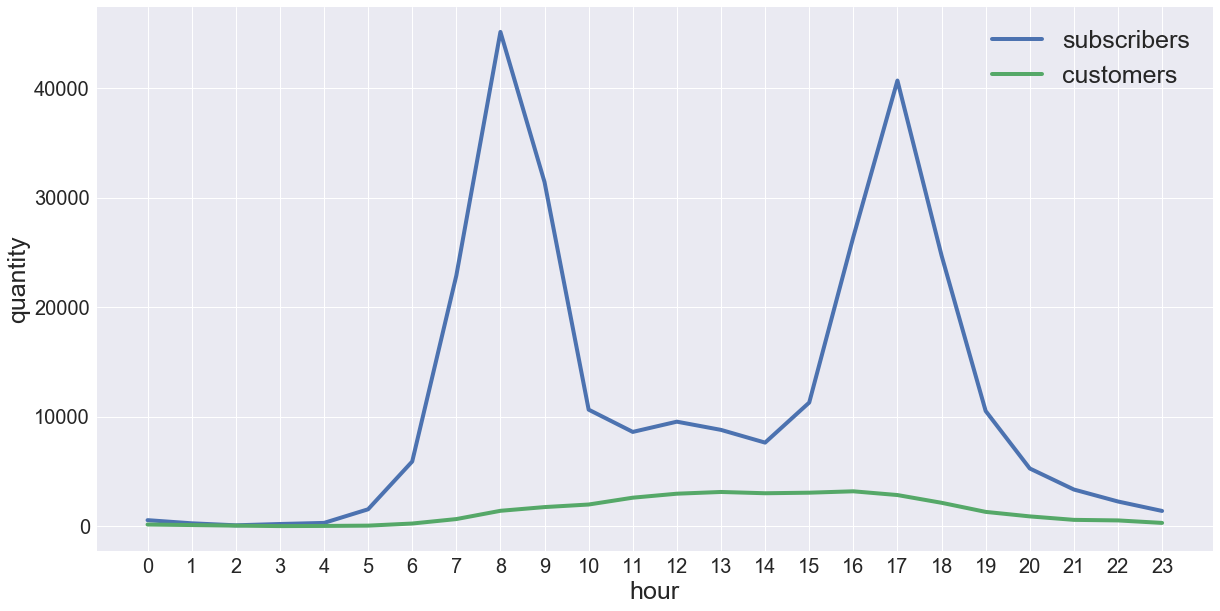

In [313]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(hour_group_s,lw=4,label='subscribers')
ax.plot(hour_group_c, lw=4,label='customers')
ax.set_xlabel('hour',fontsize=25)
ax.set_ylabel('quantity',fontsize=25)
plt.xticks(np.arange(0,24),fontsize=20)
plt.yticks(fontsize=20)
ax.yaxis.get_offset_text().set_fontsize(20)
plt.legend(fontsize=25)
#plt.rc('font', size=20)
#plt.rcParams['font.size']=20

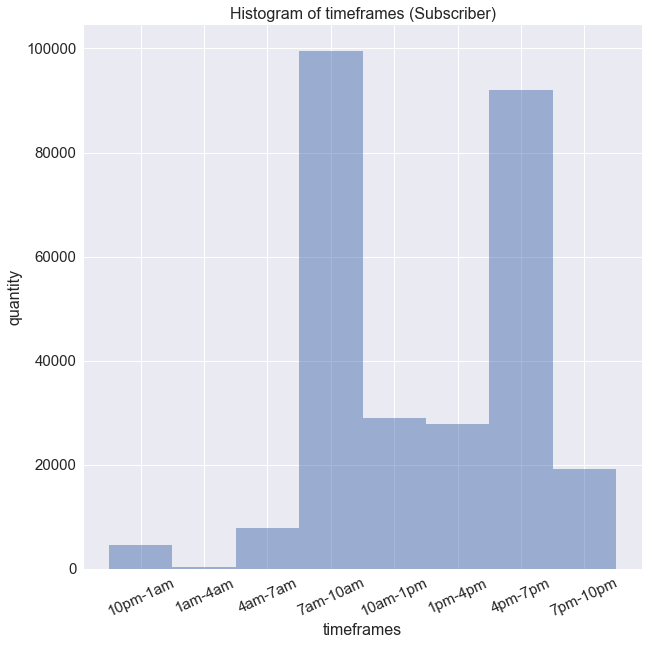

In [209]:
timeframes = ['10pm-1am','1am-4am','4am-7am','7am-10am','10am-1pm','1pm-4pm','4pm-7pm','7pm-10pm']
bins = np.arange(1,10) - 0.5
fig, ax = plt.subplots(figsize=(10,10))
trip_s['timeframe'].hist(bins=bins,alpha=0.5)
plt.xticks(range(1,9),timeframes,rotation=25,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('timeframes',fontsize=16)
plt.ylabel('quantity',fontsize=16)
plt.title('Histogram of timeframes (Subscriber)',fontsize=16)
plt.show()

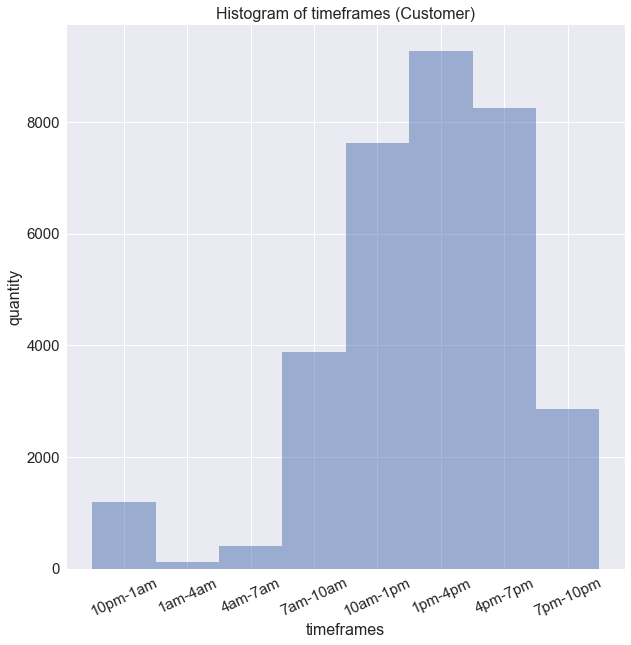

In [210]:
bins = np.arange(1,10) - 0.5
fig, ax = plt.subplots(figsize=(10,10))
trip_c['timeframe'].hist(bins=bins,alpha=0.5)
plt.xticks(range(1,9),timeframes,rotation=25,fontsize=15)
plt.yticks(fontsize=15)
#plt.xticks([['a','b','c','d','e']])
plt.xlabel('timeframes',fontsize=16)
plt.ylabel('quantity',fontsize=16)
plt.title('Histogram of timeframes (Customer)',fontsize=16)
plt.show()

In [176]:
trip_s['timeframe'].value_counts()

4    99532
7    91922
5    28879
6    27799
8    19223
3     7834
1     4570
2      334
Name: timeframe, dtype: int64

In [201]:
maximum_s = max(trip_s['timeframe'].value_counts())
maximum_c = max(trip_c['timeframe'].value_counts())

In [202]:
trip_c['timeframe'].value_counts()

6    9274
7    8248
5    7629
4    3881
8    2861
1    1191
3     398
2     114
Name: timeframe, dtype: int64

In [206]:
normed_times_s = [ele/float(maximum_s) for ele in trip_s['timeframe'].value_counts().values.tolist()]
normed_times_c = [ele/float(maximum_c) for ele in trip_c['timeframe'].value_counts().values.tolist()]

In [212]:
times = ['7am-10am','4pm-7pm','10am-1pm','1pm-4pm','7pm-10pm','4am-7am','10pm-1am','1am-4am']
for i,ele in enumerate(times):
    print times[i], normed_times_s[i]

7am-10am 1.0
4pm-7pm 0.92354217739
10am-1pm 0.290147892135
1pm-4pm 0.279297110477
7pm-10pm 0.193133866495
4am-7am 0.0787083551019
10pm-1am 0.0459148816461
1am-4am 0.00335570469799


In [213]:
times = ['4pm-7pm','7am-10am','1pm-4pm','10am-1pm','7pm-10pm','10pm-1am','4am-7am','1am-4am']
for i,ele in enumerate(times):
    print times[i], normed_times_c[i]

4pm-7pm 1.0
7am-10am 0.889368125943
1pm-4pm 0.822622385163
10am-1pm 0.418481777011
7pm-10pm 0.308496872978
10pm-1am 0.128423549709
4am-7am 0.0429156782402
1am-4am 0.0122924304507


In [253]:
def Month(date):
         return date.month
trip_s['month'] = trip_s['Start Date'].apply(Month)
trip_c['month'] = trip_c['Start Date'].apply(Month)

C:\Users\Christiana\Anaconda3\envs\venv\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Christiana\Anaconda3\envs\venv\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [299]:
trip_s.head()

Trip ID  Duration          Start Date  \
0   913465       746 2015-09-01 00:10:00   
1   913466       969 2015-09-01 00:15:00   
2   913467       233 2015-09-01 00:15:00   
3   913468       213 2015-09-01 01:29:00   
4   913469       574 2015-09-01 01:33:00   

                             Start Station  Start Terminal       End Date  \
0  San Francisco Caltrain 2 (330 Townsend)              69  9/1/2015 0:23   
1                          Clay at Battery              41  9/1/2015 0:31   
2                         Davis at Jackson              42  9/1/2015 0:19   
3                          Clay at Battery              41  9/1/2015 1:32   
4                        Steuart at Market              74  9/1/2015 1:42   

                               End Station  End Terminal  Bike #  \
0                  San Francisco City Hall            58     238   
1                     Washington at Kearny            46      16   
2                 Commercial at Montgomery            45     534   
3                        Steuart at Market            74     312   
4  San Francisco Caltrain 2 (330 Townsend)            69     279   

  Subscriber Type Zip Code  zipcode_group  timeframe  hour  month  
0      Subscriber    94107              1          1     0      9  
1      Subscriber    94133              1          1     0      9  
2      Subscriber    94111              1          1     0      9  
3      Subscriber    94107              1          1     1      9  
4      Subscriber    94107              1          1     1      9

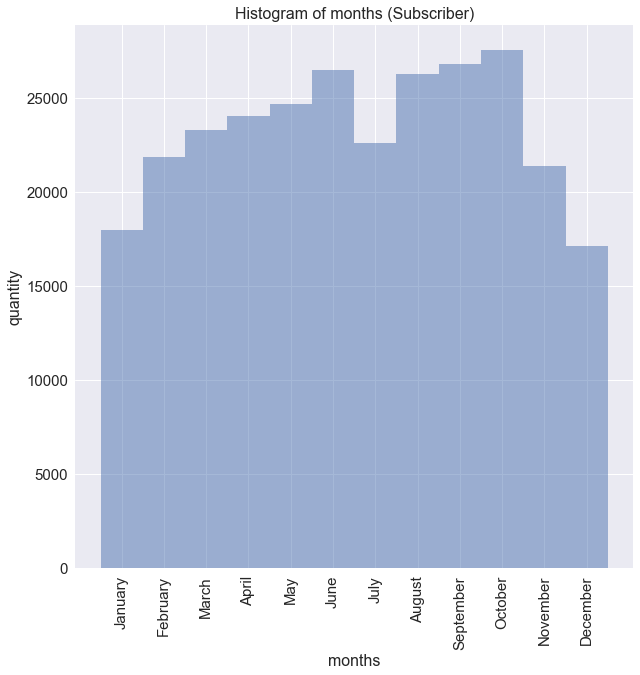

In [259]:
bins = np.arange(1,14) - 0.5
fig, ax = plt.subplots(figsize=(10,10))
trip_s['month'].hist(bins=bins,alpha=0.5)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(range(1,13),months,rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('months',fontsize=16)
plt.ylabel('quantity',fontsize=16)
plt.title('Histogram of months (Subscriber)',fontsize=16)
plt.show()

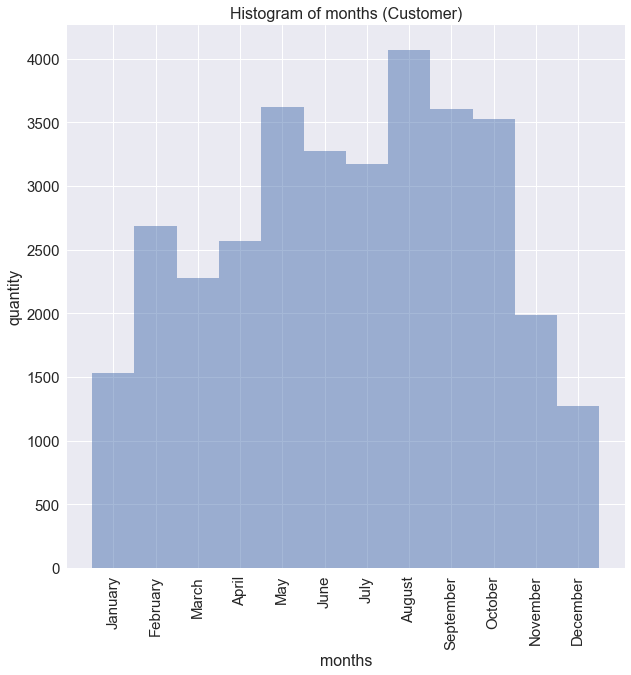

In [260]:
bins = np.arange(1,14) - 0.5
fig, ax = plt.subplots(figsize=(10,10))
trip_c['month'].hist(bins=bins,alpha=0.5)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(range(1,13),months,rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('months',fontsize=16)
plt.ylabel('quantity',fontsize=16)
plt.title('Histogram of months (Customer)',fontsize=16)
plt.show()

In [521]:
month_group_s = trip_s.groupby(by='month').agg({'Trip ID': 'count'})
month_group_c = trip_c.groupby(by='month').agg({'Trip ID': 'count'})

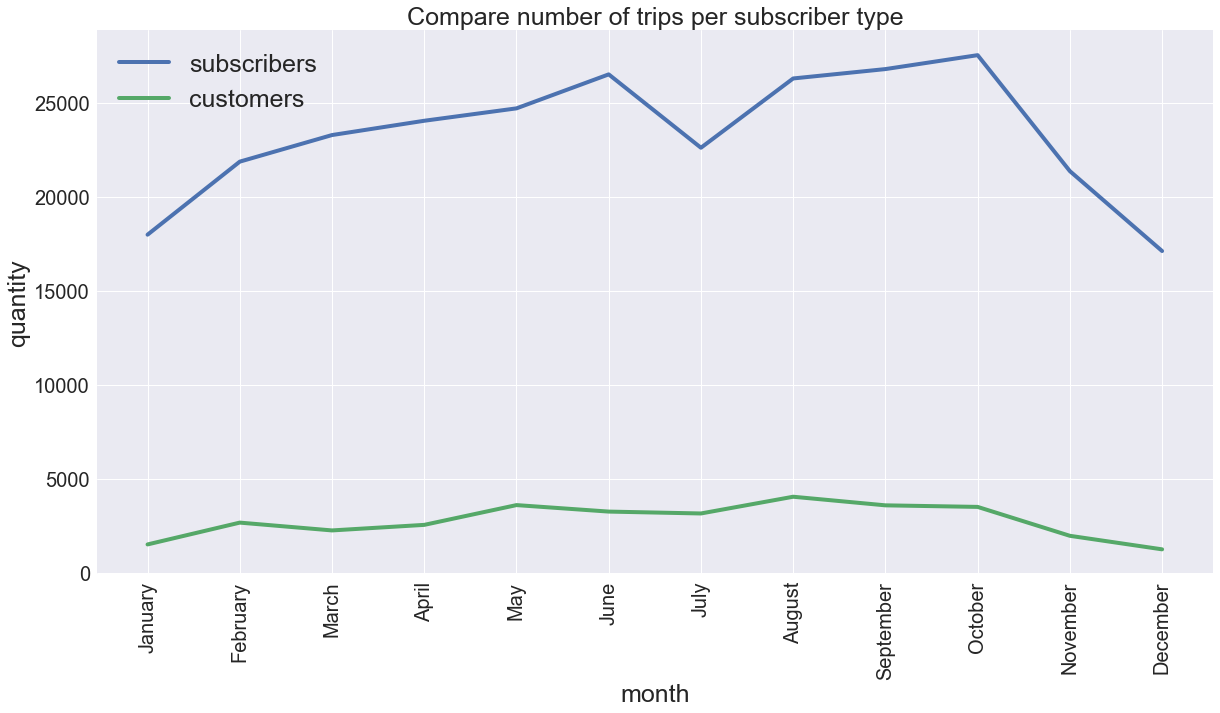

In [524]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(month_group_s,lw=4,label='subscribers')
ax.plot(month_group_c, lw=4,label='customers')
ax.set_xlabel('month',fontsize=25)
ax.set_ylabel('quantity',fontsize=25)
plt.xticks(np.arange(1,13),months,fontsize=20,rotation=45)
plt.yticks(fontsize=20)
ax.yaxis.get_offset_text().set_fontsize(20)
plt.title('Compare number of trips per subscriber type',fontsize=25)
plt.legend(fontsize=25)

## Trip duration

In [543]:
station

station_id                                           name        lat  \
0          2.0              San Jose Diridon Caltrain Station  37.329732   
1          3.0                          San Jose Civic Center  37.330698   
2          4.0                         Santa Clara at Almaden  37.333988   
3          5.0                               Adobe on Almaden  37.331415   
4          6.0                               San Pedro Square  37.336721   
5          7.0                           Paseo de San Antonio  37.333798   
6          8.0                            San Salvador at 1st  37.330165   
7          9.0                                      Japantown  37.348742   
8         10.0                             San Jose City Hall  37.337391   
9         11.0                                    MLK Library  37.335885   
10        12.0                         SJSU 4th at San Carlos  37.332808   
11        13.0                                  St James Park  37.339301   
12        14.0                       Arena Green / SAP Center  37.332692   
13        16.0                     SJSU - San Salvador at 9th  37.333955   
14        80.0                Santa Clara County Civic Center  37.352601   
15        84.0                                    Ryland Park  37.342725   
16        89.0                       S. Market st at Park Ave  37.332398   
17        88.0                   5th S. at E. San Salvador St  37.331957   
18        41.0                                Clay at Battery  37.795001   
19        42.0                               Davis at Jackson  37.797280   
20        45.0                       Commercial at Montgomery  37.794231   
21        46.0                          Washington at Kearney  37.795425   
22        47.0                                Post at Kearney  37.788975   
23        48.0                         Embarcadero at Vallejo  37.799953   
24        49.0                                Spear at Folsom  37.790302   
25        50.0           Harry Bridges Plaza (Ferry Building)  37.795392   
26        51.0                          Embarcadero at Folsom  37.791464   
27        39.0                             Powell Street BART  37.783871   
28        54.0                          Embarcadero at Bryant  37.787152   
29        55.0  Temporary Transbay Terminal (Howard at Beale)  37.789756   
..         ...                                            ...        ...   
37        63.0                                  Howard at 2nd  37.786978   
38        64.0                              2nd at South Park  37.782259   
39        65.0                                Townsend at 7th  37.771058   
40        66.0                       South Van Ness at Market  37.774814   
41        67.0                                 Market at 10th  37.776619   
42        68.0  Yerba Buena Center of the Arts (3rd @ Howard)  37.784878   
43        69.0        San Francisco Caltrain 2 (330 Townsend)  37.776600   
44        70.0       San Francisco Caltrain (Townsend at 4th)  37.776617   
45        71.0                  Powell at Post (Union Square)  37.788446   
46        72.0              Civic Center BART (7th at Market)  37.781039   
47        73.0                Grant Avenue at Columbus Avenue  37.797900   
48        74.0                              Steuart at Market  37.794139   
49        75.0            Mechanics Plaza (Market at Battery)  37.791300   
50        76.0                                  Market at 4th  37.786305   
51        77.0                              Market at Sansome  37.789625   
52        82.0                      Broadway St at Battery St  37.798541   
53        90.0                            5th St at Folsom St  37.780148   
54        91.0                    Cyril Magnin St at Ellis St  37.785908   
55        34.0                     Palo Alto Caltrain Station  37.443988   
56        35.0                         University and Emerson  37.444521   
57        36.0                California Ave Caltrai

In [531]:
trip_s.head()

Trip ID  Duration          Start Date  \
0   913465       746 2015-09-01 00:10:00   
1   913466       969 2015-09-01 00:15:00   
2   913467       233 2015-09-01 00:15:00   
3   913468       213 2015-09-01 01:29:00   
4   913469       574 2015-09-01 01:33:00   

                             Start Station  Start Terminal       End Date  \
0  San Francisco Caltrain 2 (330 Townsend)              69  9/1/2015 0:23   
1                          Clay at Battery              41  9/1/2015 0:31   
2                         Davis at Jackson              42  9/1/2015 0:19   
3                          Clay at Battery              41  9/1/2015 1:32   
4                        Steuart at Market              74  9/1/2015 1:42   

                               End Station  End Terminal  Bike #  \
0                  San Francisco City Hall            58     238   
1                     Washington at Kearny            46      16   
2                 Commercial at Montgomery            45     534   
3                        Steuart at Market            74     312   
4  San Francisco Caltrain 2 (330 Townsend)            69     279   

  Subscriber Type Zip Code  zipcode_group  timeframe  hour  month  gen_zipcode  
0      Subscriber    94107              1          1     0      9        94107  
1      Subscriber    94133              1          1     0      9        94107  
2      Subscriber    94111              1          1     0      9        94107  
3      Subscriber    94107              1          1     1      9        94107  
4      Subscriber    94107              1          1     1      9        94107

In [539]:
trip_group_duration_s = trip_s.groupby(by='month').agg({'Duration': 'mean'})
trip_group_duration_s['Duration'] = trip_group_duration_s['Duration']/60

trip_group_duration_c = trip_c.groupby(by='month').agg({'Duration': 'mean'})
trip_group_duration_c['Duration'] = trip_group_duration_c['Duration']/60

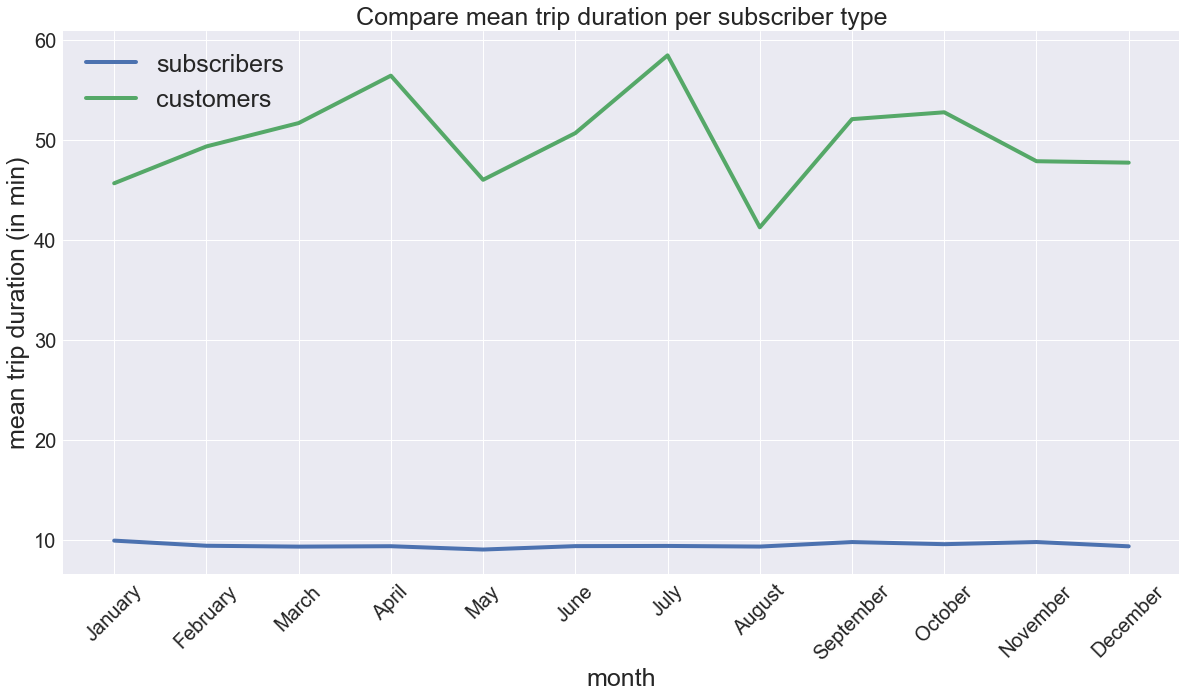

In [542]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(trip_group_duration_s,lw=4,label='subscribers')
ax.plot(trip_group_duration_c, lw=4,label='customers')
ax.set_xlabel('month',fontsize=25)
ax.set_ylabel('mean trip duration (in min)',fontsize=25)
plt.xticks(np.arange(1,13),months,fontsize=20,rotation=45)
plt.yticks(fontsize=20)
ax.yaxis.get_offset_text().set_fontsize(20)
plt.title('Compare mean trip duration per subscriber type',fontsize=25)
plt.legend(fontsize=25)

## Trip start and end

In [603]:
trip_station_join_s = trip_s.merge(station, left_on='Start Station', right_on='name', how='left') 
trip_station_join_s = trip_station_join_s[['Trip ID', 'Duration', 'Start Date', 'Start Station',
       'Start Terminal', 'End Date', 'End Station', 'End Terminal', 'Zip Code', 'zipcode_group',
       'timeframe', 'hour', 'month', 'gen_zipcode', 'lat', 'long', 'landmark']]
trip_station_join_s.columns = ['Trip ID', 'Duration', 'Start Date', 'Start Station',
       'Start Terminal', 'End Date', 'End Station', 'End Terminal',
       'Zip Code', 'zipcode_group', 'timeframe', 'hour', 'month',
       'gen_zipcode', 'lat_start', 'long_start', 'landmark']
trip_station_join_s = trip_station_join_s.merge(station, left_on='End Station', right_on='name', how='left') 
trip_station_join_s = trip_station_join_s[['Trip ID', 'Duration', 'Start Date', 'Start Station',
       'Start Terminal', 'End Date', 'End Station', 'End Terminal',
       'Zip Code', 'zipcode_group', 'timeframe', 'hour', 'month',
       'gen_zipcode', 'lat_start', 'long_start', 'landmark_x',
       'lat', 'long']]
trip_station_join_s.columns = ['Trip ID', 'Duration', 'Start Date', 'Start Station',
       'Start Terminal', 'End Date', 'End Station', 'End Terminal',
       'Zip Code', 'zipcode_group', 'timeframe', 'hour', 'month',
       'gen_zipcode', 'lat_start', 'long_start', 'landmark','lat_end','long_end']

In [604]:
trip_station_join_c = trip_c.merge(station, left_on='Start Station', right_on='name', how='left') 
trip_station_join_c = trip_station_join_c[['Trip ID', 'Duration', 'Start Date', 'Start Station',
       'Start Terminal', 'End Date', 'End Station', 'End Terminal', 'Zip Code', 'zipcode_group',
       'timeframe', 'hour', 'month', 'gen_zipcode', 'lat', 'long', 'landmark']]
trip_station_join_c.columns = ['Trip ID', 'Duration', 'Start Date', 'Start Station',
       'Start Terminal', 'End Date', 'End Station', 'End Terminal',
       'Zip Code', 'zipcode_group', 'timeframe', 'hour', 'month',
       'gen_zipcode', 'lat_start', 'long_start', 'landmark']
trip_station_join_c = trip_station_join_c.merge(station, left_on='End Station', right_on='name', how='left') 
trip_station_join_c = trip_station_join_c[['Trip ID', 'Duration', 'Start Date', 'Start Station',
       'Start Terminal', 'End Date', 'End Station', 'End Terminal',
       'Zip Code', 'zipcode_group', 'timeframe', 'hour', 'month',
       'gen_zipcode', 'lat_start', 'long_start', 'landmark_x',
       'lat', 'long']]
trip_station_join_c.columns = ['Trip ID', 'Duration', 'Start Date', 'Start Station',
       'Start Terminal', 'End Date', 'End Station', 'End Terminal',
       'Zip Code', 'zipcode_group', 'timeframe', 'hour', 'month',
       'gen_zipcode', 'lat_start', 'long_start', 'landmark','lat_end','long_end']

In [592]:
# Saving the dataframes to import them into carto
#trip_station_join_s.to_csv('trip_station_join_s.csv', sep=',')
#trip_station_join_c.to_csv('trip_station_join_c.csv', sep=',')

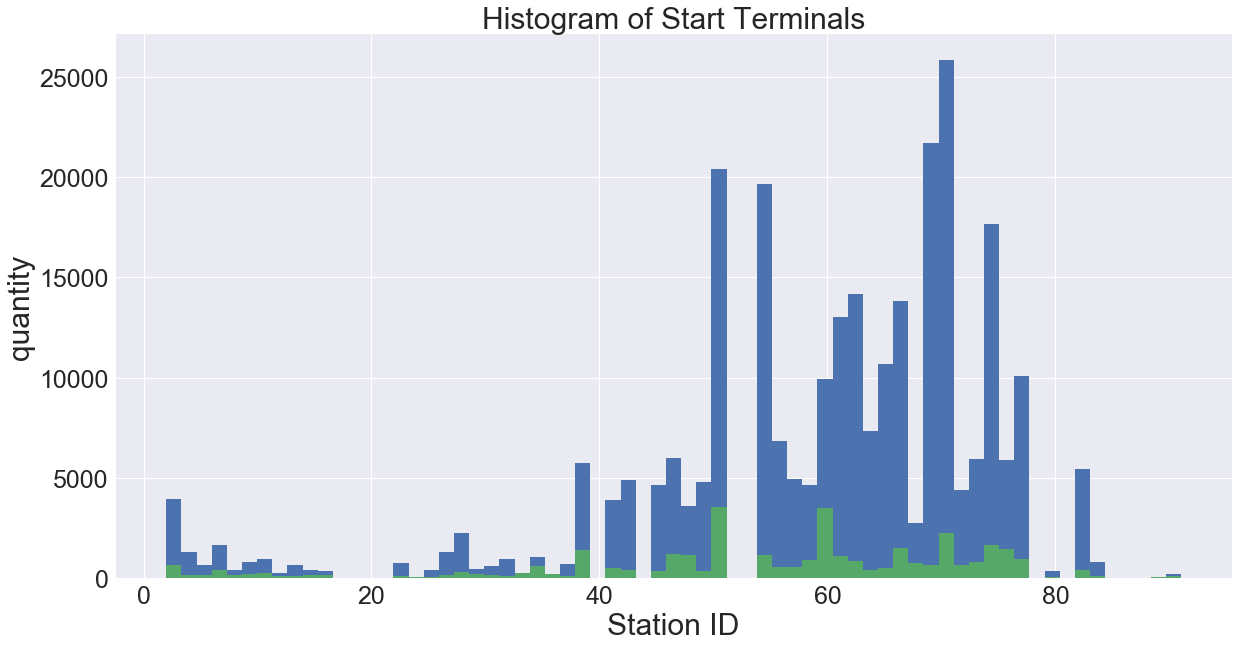

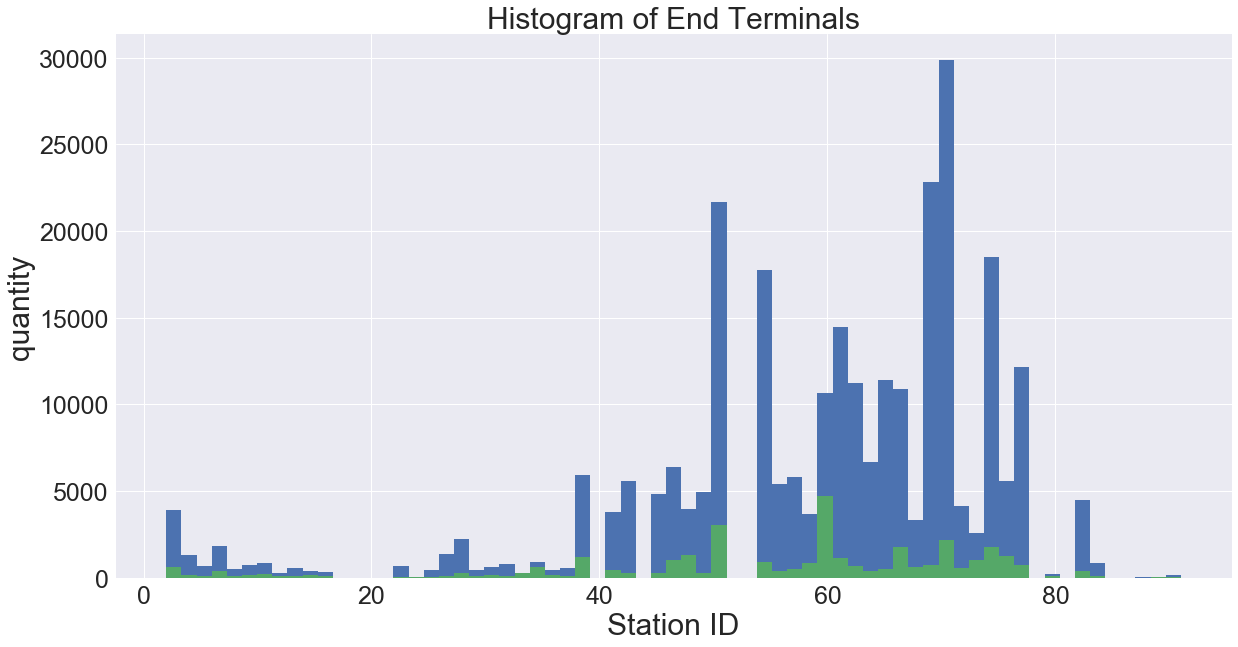

In [618]:
#bins = np.arange(1,14) - 0.5
fig, ax = plt.subplots(figsize=(20,10))
trip_s['Start Terminal'].hist(bins=67,alpha=1)
trip_c['Start Terminal'].hist(bins=67,alpha=1)
#months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Station ID',fontsize=30)
plt.ylabel('quantity',fontsize=30)
plt.title('Histogram of Start Terminals',fontsize=30)
plt.show()

#bins = np.arange(1,14) - 0.5
fig, ax = plt.subplots(figsize=(20,10))
trip_s['End Terminal'].hist(bins=67,alpha=1)
trip_c['End Terminal'].hist(bins=67,alpha=1)
#months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Station ID',fontsize=30)
plt.ylabel('quantity',fontsize=30)
plt.title('Histogram of End Terminals',fontsize=30)
plt.show()

# Weather data

In [214]:
weather.head()

PDT  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
0  9/1/2015                75                 67                58   
1  9/2/2015                73                 68                62   
2  9/3/2015                70                 65                60   
3  9/4/2015                72                 64                55   
4  9/5/2015                79                 65                51   

   Max Dew PointF  MeanDew PointF  Min DewpointF  Max Humidity  \
0              58              56             54            84   
1              59              56             54            78   
2              57              54             50            84   
3              52              50             48            77   
4              53              48             44            89   

    Mean Humidity   Min Humidity  ...     Mean VisibilityMiles  \
0              67             49  ...                     10.0   
1              68             57  ...                     10.0   
2              69             53  ...                     10.0   
3              61             44  ...                     10.0   
4              60             30  ...                     10.0   

    Min VisibilityMiles   Max Wind SpeedMPH   Mean Wind SpeedMPH  \
0                   6.0                  22                    9   
1                  10.0                  23                   12   
2                  10.0                  18                   12   
3                   7.0                  20                   10   
4                  10.0                  21                    7   

    Max Gust SpeedMPH  PrecipitationIn   CloudCover   Events   WindDirDegrees  \
0                26.0                0            2      NaN              245   
1                26.0                0            5      NaN              249   
2                25.0                0            2      NaN              250   
3                24.0                0            2      NaN              233   
4                24.0                0            2      NaN              289   

     ZIP  
0  94107  
1  94107  
2  94107  
3  94107  
4  94107  

[5 rows x 24 columns]

In [337]:
weather.columns

Index([u'PDT', u'Max TemperatureF', u'Mean TemperatureF', u'Min TemperatureF',
       u'Max Dew PointF', u'MeanDew PointF', u'Min DewpointF', u'Max Humidity',
       u' Mean Humidity', u' Min Humidity', u' Max Sea Level PressureIn',
       u' Mean Sea Level PressureIn', u' Min Sea Level PressureIn',
       u' Max VisibilityMiles', u' Mean VisibilityMiles',
       u' Min VisibilityMiles', u' Max Wind SpeedMPH', u' Mean Wind SpeedMPH',
       u' Max Gust SpeedMPH', u'PrecipitationIn', u' CloudCover', u' Events',
       u' WindDirDegrees', u'ZIP'],
      dtype='object')

In [339]:
weather[' Events'].value_counts()

Rain                 299
Fog                   49
Fog-Rain               9
Rain-Thunderstorm      9
Name:  Events, dtype: int64

In [395]:
#def Events(event):
#    if event == 'Rain':
#        return 1
#    elif event == 'Fog':
#        return 2
#    elif event == 'Fog-Rain':
#        return 3
#    elif event == 'Rain-Thunderstorm':
#        return 4
#    elif pd.isnull(zip):
#        return np.nan
#    
#weather['events'] = weather[' Events'].apply(Events)  

In [244]:
weather['PDT'] = pd.to_datetime(weather['PDT'])
weather['month'] = weather['PDT'].apply(Month)

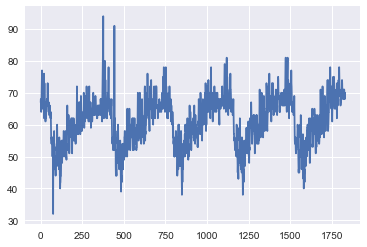

In [245]:
plt.plot(weather['Mean TemperatureF'])

In [525]:
#weather_group_events = weather.groupby(by='PDT').agg({' Events': 'count'})
#weather_group_events.head()

In [386]:
weather_group_temp_per_d = weather.groupby(by='PDT').agg({'Mean TemperatureF': 'mean'})
weather_group_temp_per_d = weather_group_temp_per_d.reset_index()
weather_group_temp_per_d['month'] = weather_group_temp_per_d['PDT'].apply(Month)
weather_group_temp_per_d.head()

PDT  Mean TemperatureF  month
0 2015-09-01               68.2      9
1 2015-09-02               68.0      9
2 2015-09-03               65.8      9
3 2015-09-04               64.2      9
4 2015-09-05               67.8      9

In [390]:
weather_group_temp_per_m = weather_group_temp_per_d.groupby(by='month').agg({'Mean TemperatureF': 'mean'})
weather_group_temp_per_m = weather_group_temp_per_m.reset_index()

(array([ 35.,  40.,  45.,  50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.]),
 <a list of 11 Text yticklabel objects>)

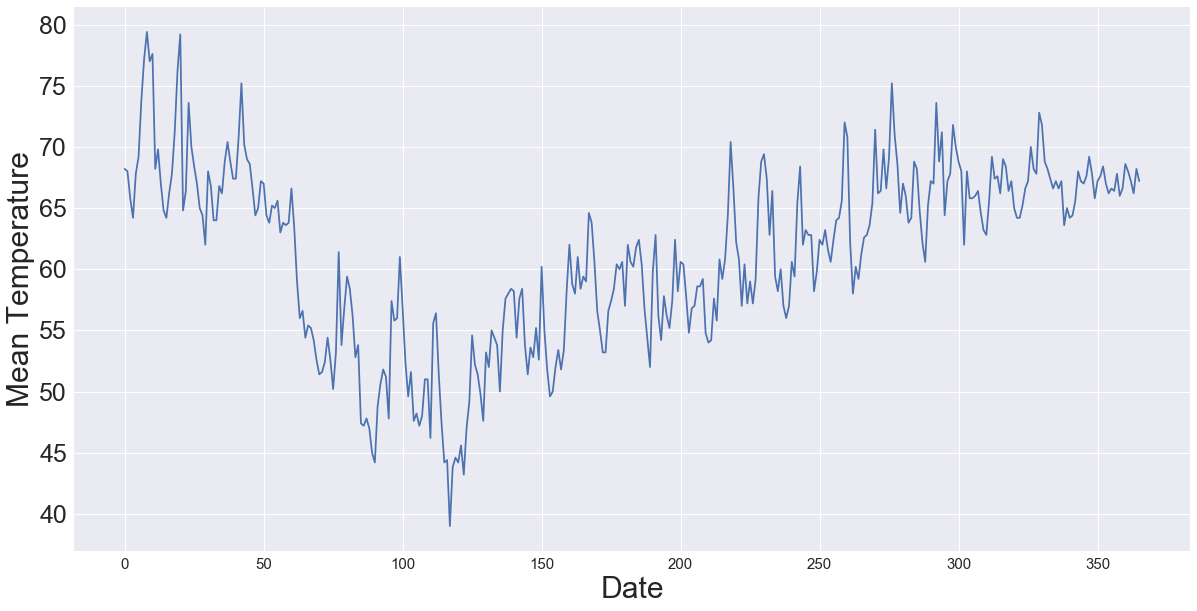

In [298]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(weather_group_temp_per_d['Mean TemperatureF'])
ax.set_xlabel('Date',fontsize=30)
ax.set_ylabel('Mean Temperature',fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=25)

In [329]:
month_group_s = month_group_s.reset_index()
month_group_c = month_group_c.reset_index()
month_group_s.head()

index  month  Trip ID
0      0      1    17989
1      1      2    21870
2      2      3    23283
3      3      4    24042
4      4      5    24701

In [330]:
trip_weather_join_s = weather_group_temp_per_m.merge(month_group_s, on='month', how='left') 
trip_weather_join_c = weather_group_temp_per_m.merge(month_group_c, on='month', how='left') 

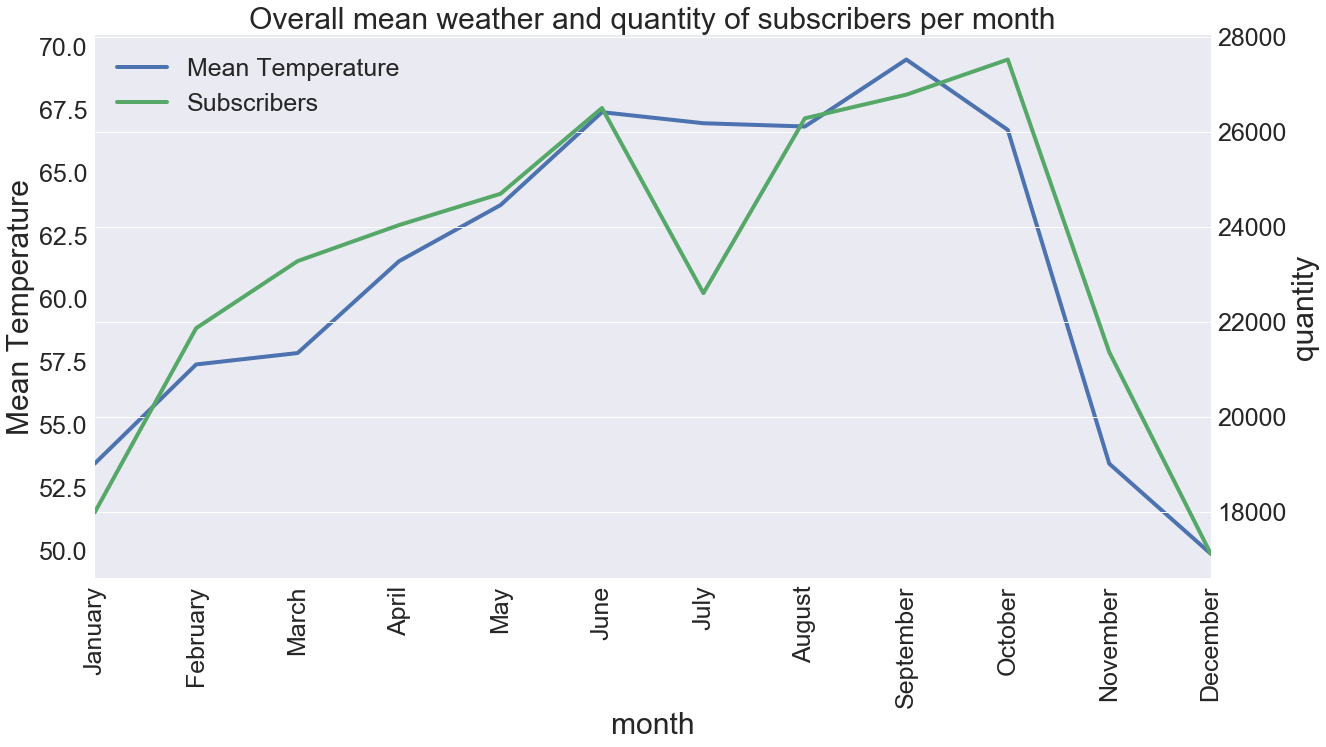

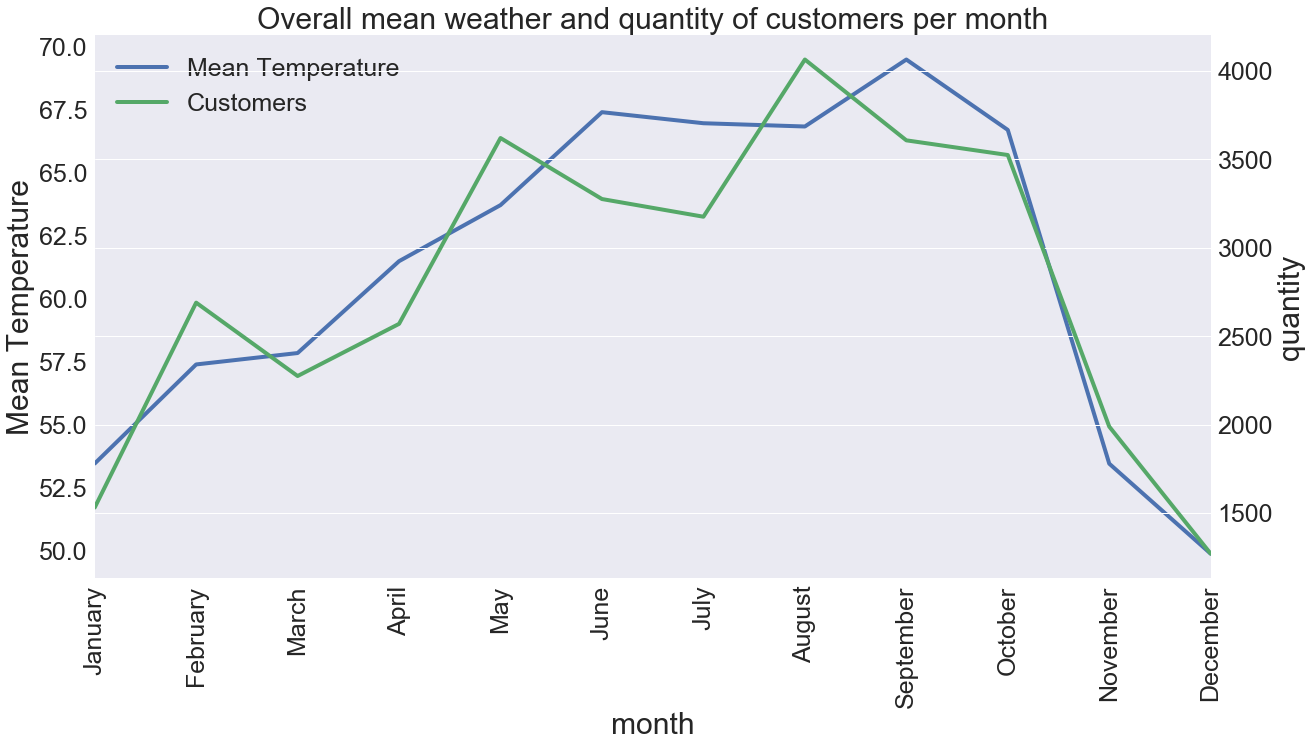

In [487]:
fig,ax = plt.subplots(figsize=(20,10))
trip_weather_join_s['Mean TemperatureF'].plot(lw=4, label='Mean Temperature')
trip_weather_join_s['Trip ID'].plot(secondary_y=True,lw=4, label='Subscribers')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left',fontsize=25)

ax.set_xlabel('month',fontsize=30)
ax.set_ylabel('Mean Temperature',fontsize=30)

plt.yticks(fontsize=25)
plt.title('Overall mean weather and quantity of subscribers per month',fontsize=30)
plt.xticks(range(0,12),months,rotation=90,fontsize=25)
plt.yticks(fontsize=25)
ax.right_ax.set_ylabel('quantity',fontsize=30)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
    
fig,ax = plt.subplots(figsize=(20,10))
trip_weather_join_c['Mean TemperatureF'].plot(lw=4, label='Mean Temperature')
trip_weather_join_c['Trip ID'].plot(secondary_y=True,lw=4, label='Customers')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left',fontsize=25)

ax.set_xlabel('month',fontsize=30)
ax.set_ylabel('Mean Temperature',fontsize=30)

plt.yticks(fontsize=25)
plt.title('Overall mean weather and quantity of customers per month',fontsize=30)
plt.xticks(range(0,12),months,rotation=90,fontsize=25)
plt.yticks(fontsize=25)
ax.right_ax.set_ylabel('quantity',fontsize=30)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)

## Checking the weather per area

In [496]:
weather_SF = weather.loc[0:365,:]
weather_RC = weather.loc[366:731,:]
weather_PA = weather.loc[732:1097,:]
weather_MV = weather.loc[1098:1463,:]
weather_SJ = weather.loc[1464:1829,:]

### Checking, if rain, fog and thunderstorm could be the reason for the reduction

unfortunately it doesn't seem to be true

In [516]:
# What is the average cloud-cover per month
#weather_SF.groupby(by='month').agg({' CloudCover': 'mean'})

CloudCover
month             
1         6.193548
2         3.655172
3         4.774194
4         4.133333
5         4.645161
6         3.200000
7         3.354839
8         4.580645
9         3.366667
10        3.161290
11        2.466667
12        4.419355

In [502]:
# Building datasets for rainy days and counting the number of days per month
weather_SF_rain = weather_SF[weather_SF[' Events']=='Rain']
weather_PA_rain = weather_PA[weather_PA[' Events']=='Rain']
weather_MV_rain = weather_MV[weather_MV[' Events']=='Rain']
weather_SJ_rain = weather_SJ[weather_SJ[' Events']=='Rain']

weather_SF_rain_per_m = weather_SF_rain.groupby(by='month').agg({' Events': 'count'})
weather_PA_rain_per_m = weather_PA_rain.groupby(by='month').agg({' Events': 'count'})
weather_MV_rain_per_m = weather_MV_rain.groupby(by='month').agg({' Events': 'count'})
weather_SJ_rain_per_m = weather_SJ_rain.groupby(by='month').agg({' Events': 'count'})

In [503]:
# Building datasets for foggy-rainy days and counting the number of days per month
weather_SF_fograin = weather_SF[weather_SF[' Events']=='Fog-Rain']
weather_PA_fograin = weather_PA[weather_PA[' Events']=='Fog-Rain']
weather_MV_fograin = weather_MV[weather_MV[' Events']=='Fog-Rain']
weather_SJ_fograin = weather_SJ[weather_SJ[' Events']=='Fog-Rain']

weather_SF_fograin_per_m = weather_SF_fograin.groupby(by='month').agg({' Events': 'count'})
weather_PA_fograin_per_m = weather_PA_fograin.groupby(by='month').agg({' Events': 'count'})
weather_MV_fograin_per_m = weather_MV_fograin.groupby(by='month').agg({' Events': 'count'})
weather_SJ_fograin_per_m = weather_SJ_fograin.groupby(by='month').agg({' Events': 'count'})

In [505]:
# Building datasets for foggy days and counting the number of days per month
weather_SF_fog = weather_SF[weather_SF[' Events']=='Fog']
weather_PA_fog = weather_PA[weather_PA[' Events']=='Fog']
weather_MV_fog = weather_MV[weather_MV[' Events']=='Fog']
weather_SJ_fog = weather_SJ[weather_SJ[' Events']=='Fog']

weather_SF_fog_per_m = weather_SF_fog.groupby(by='month').agg({' Events': 'count'})
weather_PA_fog_per_m = weather_PA_fog.groupby(by='month').agg({' Events': 'count'})
weather_MV_fog_per_m = weather_MV_fog.groupby(by='month').agg({' Events': 'count'})
weather_SJ_fog_per_m = weather_SJ_fog.groupby(by='month').agg({' Events': 'count'})

In [507]:
# Building datasets for thunderstorm days and counting the number of days per month
weather_SF_thunder = weather_SF[weather_SF[' Events']=='Rain-Thunderstorm']
weather_PA_thunder = weather_PA[weather_PA[' Events']=='Rain-Thunderstorm']
weather_MV_thunder = weather_MV[weather_MV[' Events']=='Rain-Thunderstorm']
weather_SJ_thunder = weather_SJ[weather_SJ[' Events']=='Rain-Thunderstorm']

weather_SF_thunder_per_m = weather_SF_thunder.groupby(by='month').agg({' Events': 'count'})
weather_PA_thunder_per_m = weather_PA_thunder.groupby(by='month').agg({' Events': 'count'})
weather_MV_thunder_per_m = weather_MV_thunder.groupby(by='month').agg({' Events': 'count'})
weather_SJ_thunder_per_m = weather_SJ_thunder.groupby(by='month').agg({' Events': 'count'})

### Printing the weather data against subscriber and customer for each area

In [444]:
def Zipcodes_selected(zip):
    if zip in Zip_SF:
        return 94107#1
    elif zip in Zip_PA:
        return 94301#2
    elif zip in Zip_SJ:
        return 95113#3
    elif zip in Zip_MV:
        return 94041#4
    elif zip in Zip_surr:
        return 5
    elif pd.isnull(zip):
        return np.nan
    else:
        return 0
    
trip_s['gen_zipcode'] = trip_s['Zip Code'].apply(Zipcodes_selected)  
trip_c['gen_zipcode'] = trip_c['Zip Code'].apply(Zipcodes_selected)    

C:\Users\Christiana\Anaconda3\envs\venv\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Christiana\Anaconda3\envs\venv\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [450]:
trip_SF_s = trip_s[trip_s['gen_zipcode']==94107]
trip_PA_s = trip_s[trip_s['gen_zipcode']==94301]
trip_MV_s = trip_s[trip_s['gen_zipcode']==94041]
trip_SJ_s = trip_s[trip_s['gen_zipcode']==95113]

trip_SF_c = trip_c[trip_c['gen_zipcode']==94107]
trip_PA_c = trip_c[trip_c['gen_zipcode']==94301]
trip_MV_c = trip_c[trip_c['gen_zipcode']==94041]
trip_SJ_c = trip_c[trip_c['gen_zipcode']==95113]

In [482]:
month_group_SF_s = trip_SF_s.groupby(by='month').agg({'Trip ID': 'count'})
month_group_SF_c = trip_SF_c.groupby(by='month').agg({'Trip ID': 'count'})
month_group_SF_s = month_group_SF_s.reset_index()
month_group_SF_c = month_group_SF_c.reset_index()

month_group_PA_s = trip_PA_s.groupby(by='month').agg({'Trip ID': 'count'})
month_group_PA_c = trip_PA_c.groupby(by='month').agg({'Trip ID': 'count'})
month_group_PA_s = month_group_PA_s.reset_index()
month_group_PA_c = month_group_PA_c.reset_index()

month_group_MV_s = trip_MV_s.groupby(by='month').agg({'Trip ID': 'count'})
month_group_MV_c = trip_MV_c.groupby(by='month').agg({'Trip ID': 'count'})
month_group_MV_s = month_group_MV_s.reset_index()
month_group_MV_c = month_group_MV_c.reset_index()

month_group_SJ_s = trip_SJ_s.groupby(by='month').agg({'Trip ID': 'count'})
month_group_SJ_c = trip_SJ_c.groupby(by='month').agg({'Trip ID': 'count'})
month_group_SJ_s = month_group_SJ_s.reset_index()
month_group_SJ_c = month_group_SJ_c.reset_index()

In [477]:
#weather_group_temp2 = weather.groupby(by='month').agg({'Mean TemperatureF': 'mean'})
#weather_group_temp2 = weather_group_temp2.reset_index()

In [483]:
trip_weather_join_SF_s = weather_group_temp_per_m.merge(month_group_SF_s, on='month', how='left') 
trip_weather_join_SF_c = weather_group_temp_per_m.merge(month_group_SF_c, on='month', how='left') 

trip_weather_join_PA_s = weather_group_temp_per_m.merge(month_group_PA_s, on='month', how='left') 
trip_weather_join_PA_c = weather_group_temp_per_m.merge(month_group_PA_c, on='month', how='left')

trip_weather_join_MV_s = weather_group_temp_per_m.merge(month_group_MV_s, on='month', how='left') 
trip_weather_join_MV_c = weather_group_temp_per_m.merge(month_group_MV_c, on='month', how='left') 

trip_weather_join_SJ_s = weather_group_temp_per_m.merge(month_group_SJ_s, on='month', how='left') 
trip_weather_join_SJ_c = weather_group_temp_per_m.merge(month_group_SJ_c, on='month', how='left') 

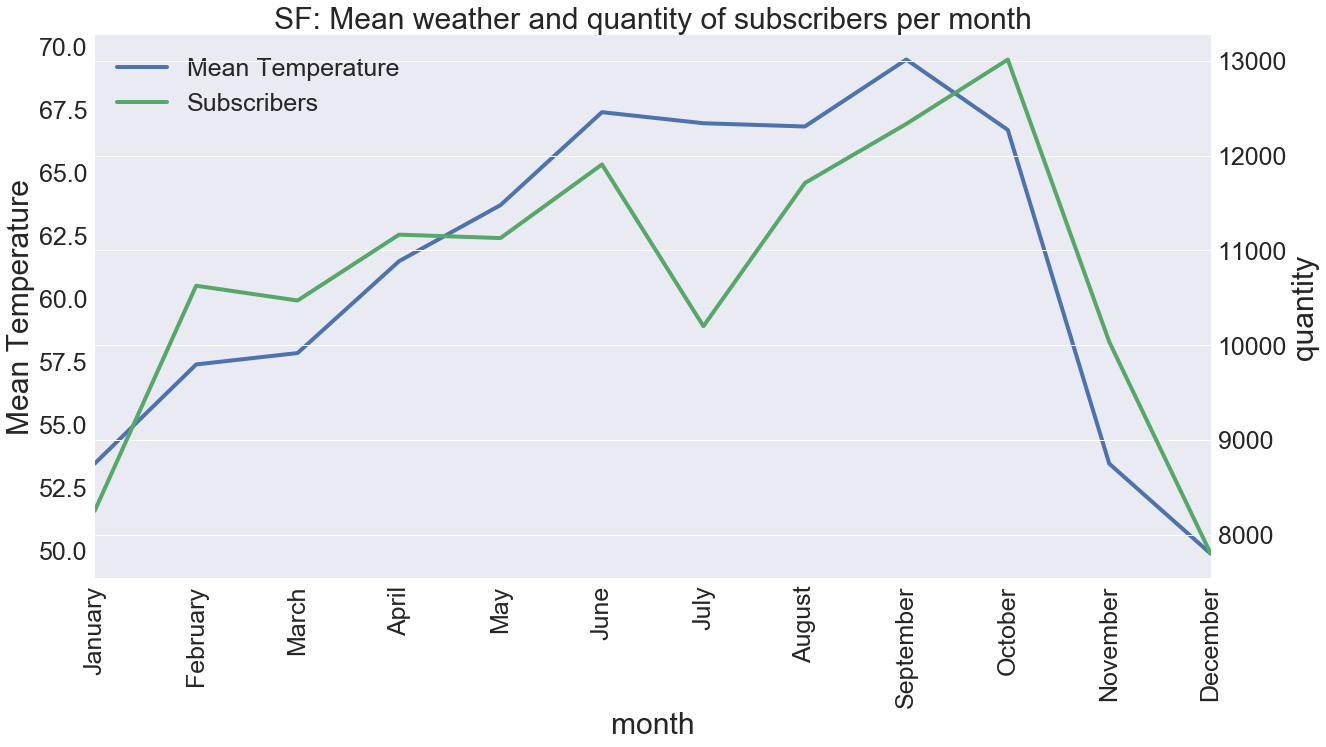

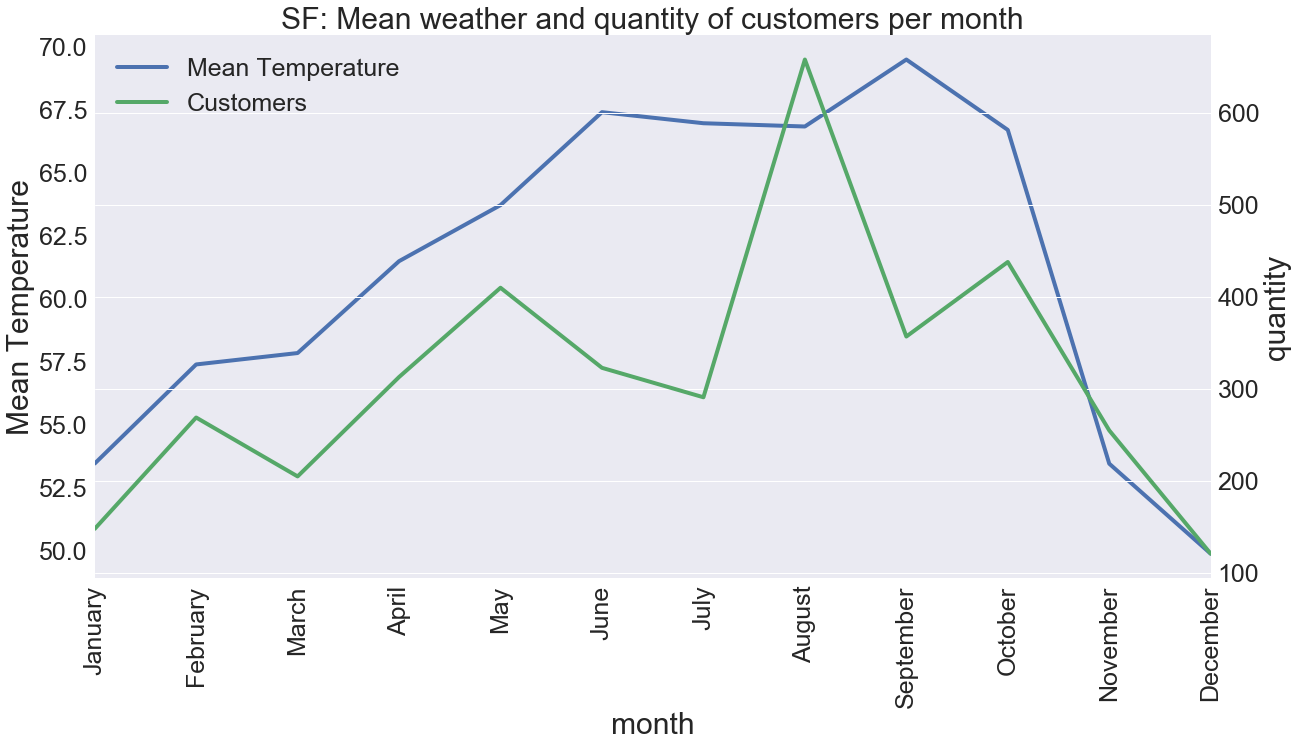

In [481]:
fig,ax = plt.subplots(figsize=(20,10))
trip_weather_join_SF_s['Mean TemperatureF'].plot(lw=4, label='Mean Temperature')
trip_weather_join_SF_s['Trip ID'].plot(secondary_y=True,lw=4, label='Subscribers')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left',fontsize=25)

ax.set_xlabel('month',fontsize=30)
ax.set_ylabel('Mean Temperature',fontsize=30)

plt.yticks(fontsize=25)
plt.title('SF: Mean weather and quantity of subscribers per month',fontsize=30)
plt.xticks(range(0,12),months,rotation=90,fontsize=25)
plt.yticks(fontsize=25)
ax.right_ax.set_ylabel('quantity',fontsize=30)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
    
fig,ax = plt.subplots(figsize=(20,10))
trip_weather_join_SF_c['Mean TemperatureF'].plot(lw=4, label='Mean Temperature')
trip_weather_join_SF_c['Trip ID'].plot(secondary_y=True,lw=4, label='Customers')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left',fontsize=25)

ax.set_xlabel('month',fontsize=30)
ax.set_ylabel('Mean Temperature',fontsize=30)

plt.yticks(fontsize=25)
plt.title('SF: Mean weather and quantity of customers per month',fontsize=30)
plt.xticks(range(0,12),months,rotation=90,fontsize=25)
plt.yticks(fontsize=25)
ax.right_ax.set_ylabel('quantity',fontsize=30)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)

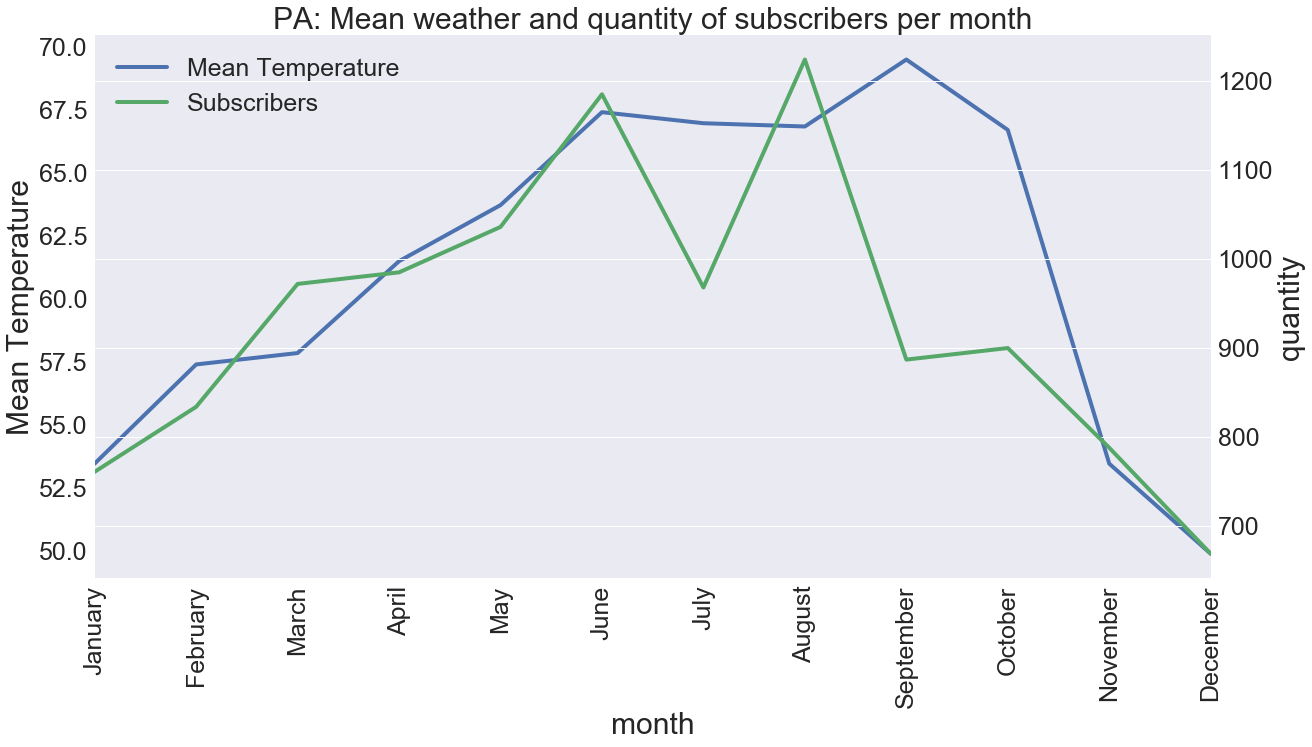

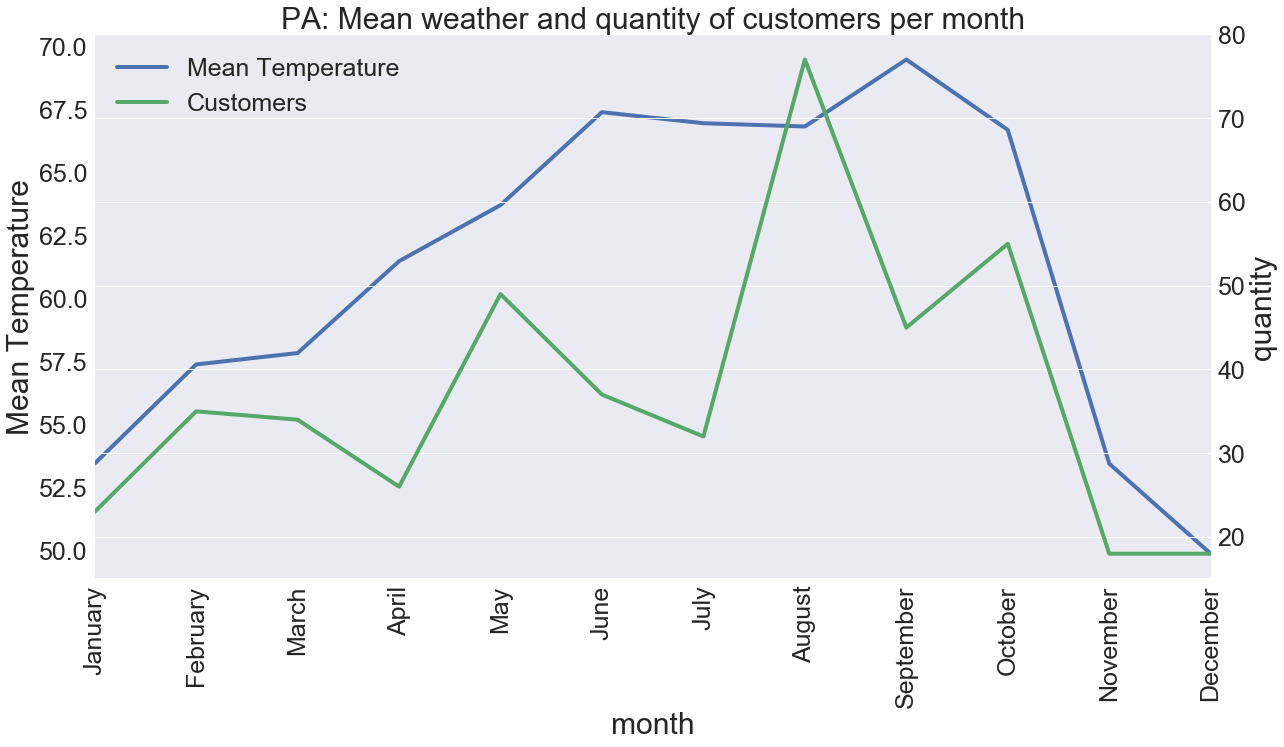

In [484]:
fig,ax = plt.subplots(figsize=(20,10))
trip_weather_join_PA_s['Mean TemperatureF'].plot(lw=4, label='Mean Temperature')
trip_weather_join_PA_s['Trip ID'].plot(secondary_y=True,lw=4, label='Subscribers')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left',fontsize=25)

ax.set_xlabel('month',fontsize=30)
ax.set_ylabel('Mean Temperature',fontsize=30)

plt.yticks(fontsize=25)
plt.title('PA: Mean weather and quantity of subscribers per month',fontsize=30)
plt.xticks(range(0,12),months,rotation=90,fontsize=25)
plt.yticks(fontsize=25)
ax.right_ax.set_ylabel('quantity',fontsize=30)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
    
fig,ax = plt.subplots(figsize=(20,10))
trip_weather_join_PA_c['Mean TemperatureF'].plot(lw=4, label='Mean Temperature')
trip_weather_join_PA_c['Trip ID'].plot(secondary_y=True,lw=4, label='Customers')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left',fontsize=25)

ax.set_xlabel('month',fontsize=30)
ax.set_ylabel('Mean Temperature',fontsize=30)

plt.yticks(fontsize=25)
plt.title('PA: Mean weather and quantity of customers per month',fontsize=30)
plt.xticks(range(0,12),months,rotation=90,fontsize=25)
plt.yticks(fontsize=25)
ax.right_ax.set_ylabel('quantity',fontsize=30)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)

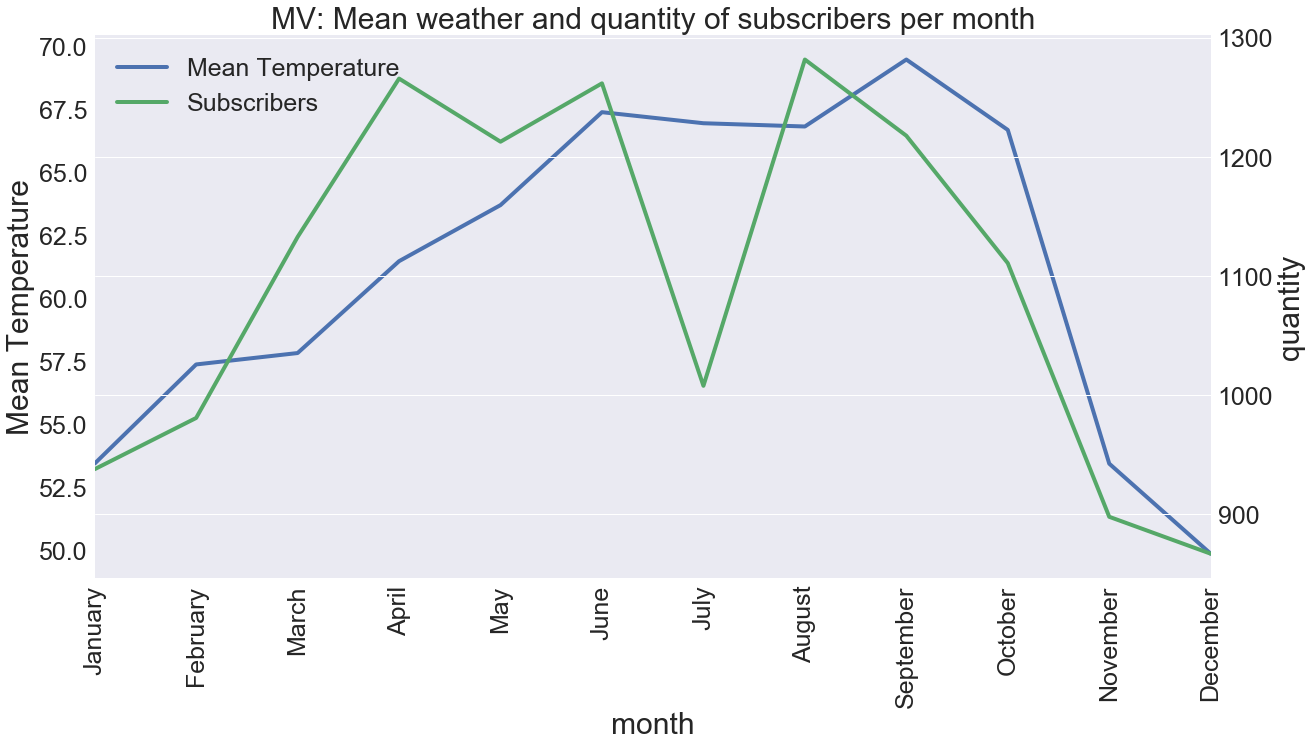

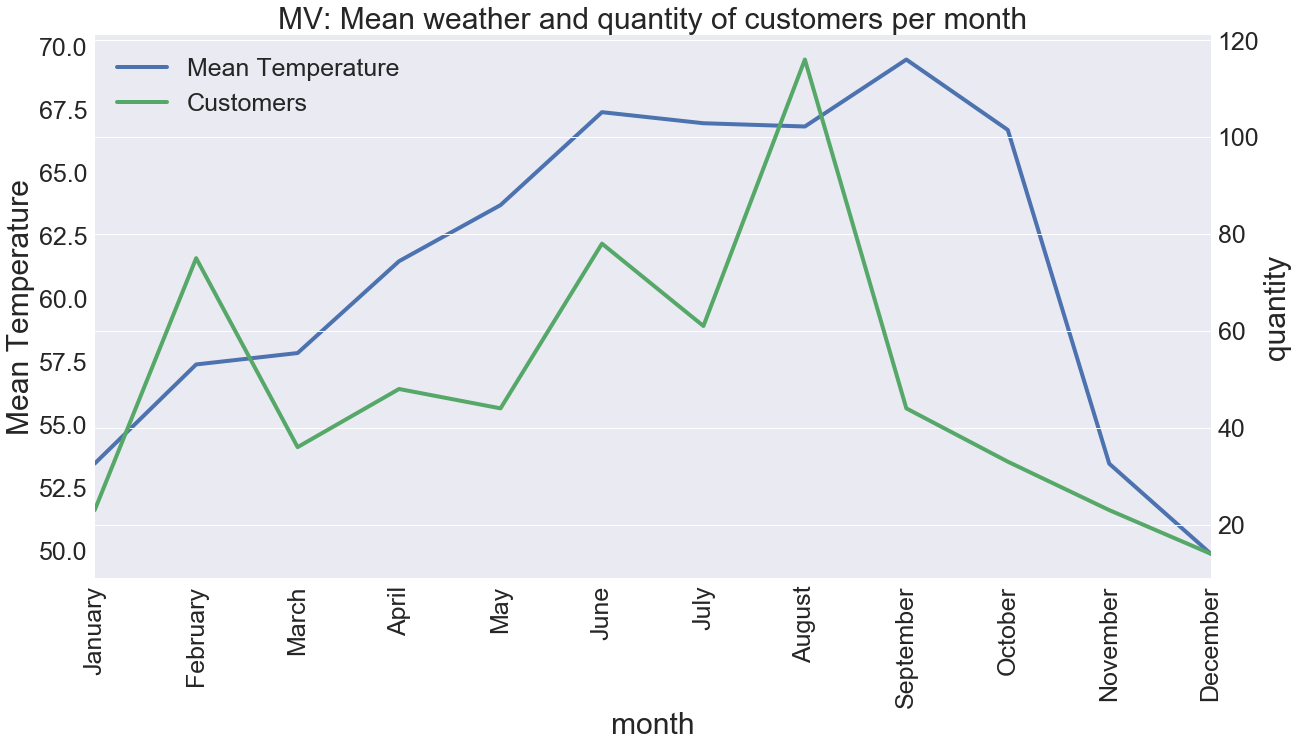

In [485]:
fig,ax = plt.subplots(figsize=(20,10))
trip_weather_join_MV_s['Mean TemperatureF'].plot(lw=4, label='Mean Temperature')
trip_weather_join_MV_s['Trip ID'].plot(secondary_y=True,lw=4, label='Subscribers')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left',fontsize=25)

ax.set_xlabel('month',fontsize=30)
ax.set_ylabel('Mean Temperature',fontsize=30)

plt.yticks(fontsize=25)
plt.title('MV: Mean weather and quantity of subscribers per month',fontsize=30)
plt.xticks(range(0,12),months,rotation=90,fontsize=25)
plt.yticks(fontsize=25)
ax.right_ax.set_ylabel('quantity',fontsize=30)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
    
fig,ax = plt.subplots(figsize=(20,10))
trip_weather_join_MV_c['Mean TemperatureF'].plot(lw=4, label='Mean Temperature')
trip_weather_join_MV_c['Trip ID'].plot(secondary_y=True,lw=4, label='Customers')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left',fontsize=25)

ax.set_xlabel('month',fontsize=30)
ax.set_ylabel('Mean Temperature',fontsize=30)

plt.yticks(fontsize=25)
plt.title('MV: Mean weather and quantity of customers per month',fontsize=30)
plt.xticks(range(0,12),months,rotation=90,fontsize=25)
plt.yticks(fontsize=25)
ax.right_ax.set_ylabel('quantity',fontsize=30)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)

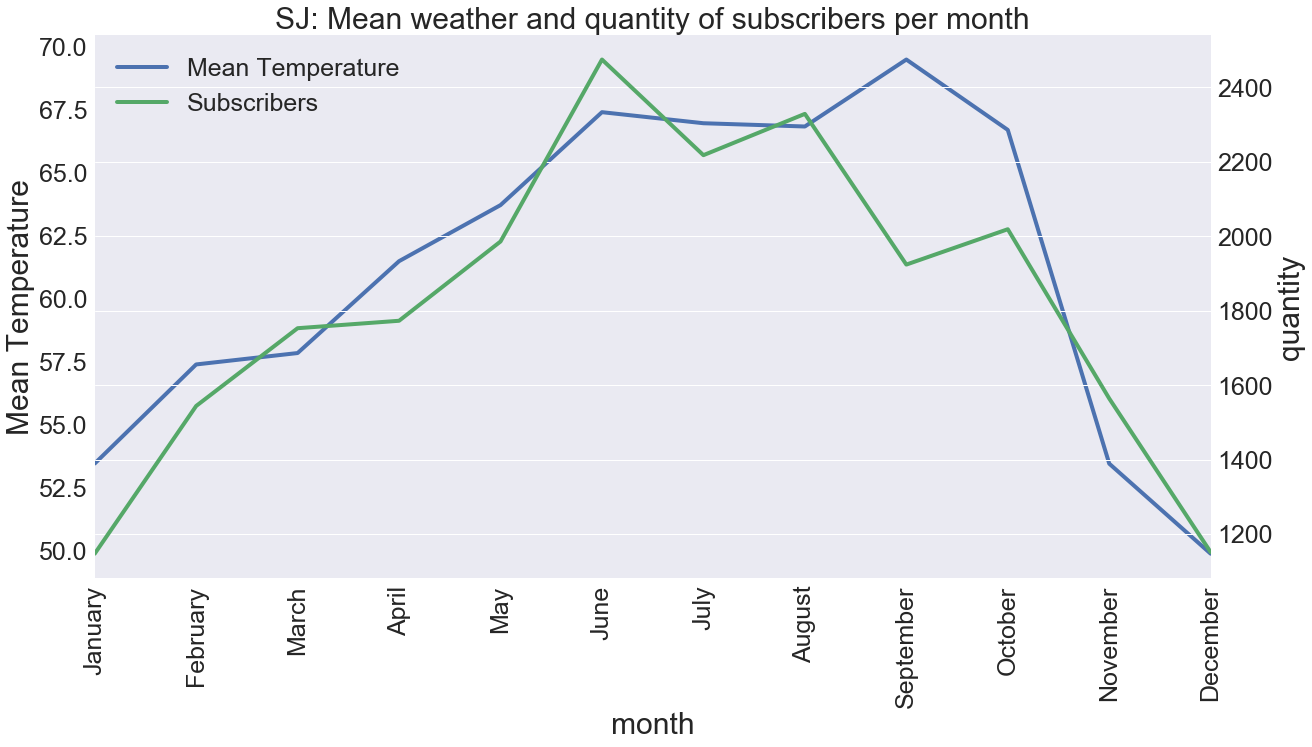

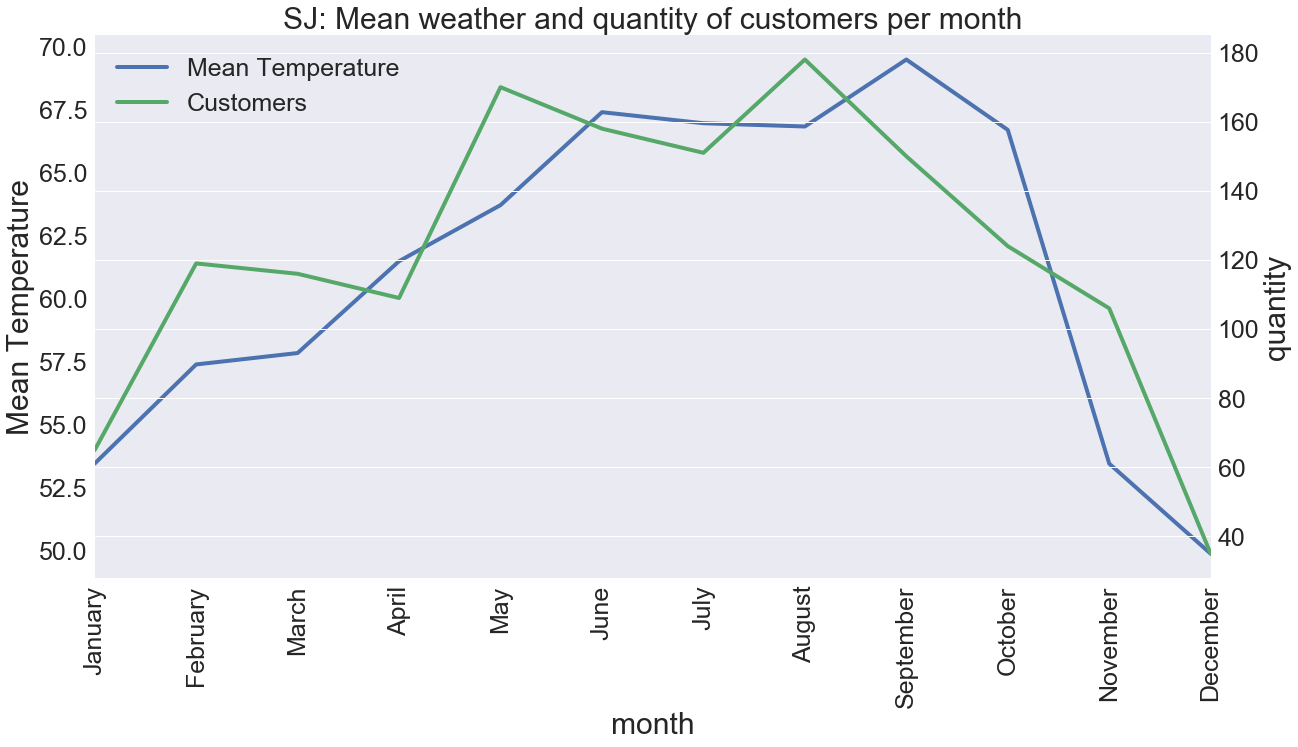

In [486]:
fig,ax = plt.subplots(figsize=(20,10))
trip_weather_join_SJ_s['Mean TemperatureF'].plot(lw=4, label='Mean Temperature')
trip_weather_join_SJ_s['Trip ID'].plot(secondary_y=True,lw=4, label='Subscribers')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left',fontsize=25)

ax.set_xlabel('month',fontsize=30)
ax.set_ylabel('Mean Temperature',fontsize=30)

plt.yticks(fontsize=25)
plt.title('SJ: Mean weather and quantity of subscribers per month',fontsize=30)
plt.xticks(range(0,12),months,rotation=90,fontsize=25)
plt.yticks(fontsize=25)
ax.right_ax.set_ylabel('quantity',fontsize=30)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
    
fig,ax = plt.subplots(figsize=(20,10))
trip_weather_join_SJ_c['Mean TemperatureF'].plot(lw=4, label='Mean Temperature')
trip_weather_join_SJ_c['Trip ID'].plot(secondary_y=True,lw=4, label='Customers')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left',fontsize=25)

ax.set_xlabel('month',fontsize=30)
ax.set_ylabel('Mean Temperature',fontsize=30)

plt.yticks(fontsize=25)
plt.title('SJ: Mean weather and quantity of customers per month',fontsize=30)
plt.xticks(range(0,12),months,rotation=90,fontsize=25)
plt.yticks(fontsize=25)
ax.right_ax.set_ylabel('quantity',fontsize=30)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)